In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np
import scipy.stats as stats
import statistics

In [2]:
data=pd.read_excel('customer_retention_dataset.xlsx', sheet_name='codedsheet')
data.head(1)

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,Delhi,110009,5,4,4,3,5,1,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com


In [3]:
columns=['gender','age','city','pinCode','shopping_since','shopping_frequency_1year','internet_type','device',
           'screen_size','OS', 'browser','1_channel','Access','time_spent','prefered_payment_mode',
           'cancel_shopping','cancel_reason','content_readability','similar_product',
           'seller_info','product_info_clarity','navigation_ease','web_speed','UI',
           'UI_payment_mode','trust_process','customer_support','privacy_garauntee',
           'Channel_Diversity','benefit','satisfaction','convenient','Return/Replacement','loyalty_program',
         'info_satisfaction','UI_Satisfaction','net_benefit','trust','product_category','relevant_info',
         'Savings','patronizing','experience','Status','gratification','role','Worthy','platform_Used',
         'convinient_accessibility','Appealing_UI','product_diversity','product_info','performance_platform','reliable_UI',
         'navigation','payment_mode_availability','speed_delivery','customer_privacy','financial_security','trust_worthiness',
        'multi_channel','slow_login_time','slow_display_time','late_price_announcement','slow_load_time','limited_payment_mode',
         'longer_delivery_period','frequent_UI_change','frequent_page_disruption','UI_efficiency','platform_recommend']
data.columns = columns
pd.set_option('max_columns', None)
data.head(1)

,gender,age,city,pinCode,shopping_since,shopping_frequency_1year,internet_type,device,screen_size,OS,browser,1_channel,Access,time_spent,prefered_payment_mode,cancel_shopping,cancel_reason,content_readability,similar_product,seller_info,product_info_clarity,navigation_ease,web_speed,UI,UI_payment_mode,trust_process,customer_support,privacy_garauntee,Channel_Diversity,benefit,satisfaction,convenient,Return/Replacement,loyalty_program,info_satisfaction,UI_Satisfaction,net_benefit,trust,product_category,relevant_info,Savings,patronizing,experience,Status,gratification,role,Worthy,platform_Used,convinient_accessibility,Appealing_UI,product_diversity,product_info,performance_platform,reliable_UI,navigation,payment_mode_availability,speed_delivery,customer_privacy,financial_security,trust_worthiness,multi_channel,slow_login_time,slow_display_time,late_price_announcement,slow_load_time,limited_payment_mode,longer_delivery_period,frequent_UI_change,frequent_page_disruption,UI_efficiency,platform_recommend
0,0,3,Delhi,110009,5,4,4,3,5,1,1,1,1,3,4,3,3,4,3,3,4,4,1,2,2,2,5,4,4,3,1,2,2,4,3,5,4,5,3,3,2,3,4,4,5,4,5,"Amazon.in, Paytm.com",Paytm.com,Flipkart.com,Flipkart.com,Snapdeal.com,Snapdeal.com,Paytm.com,Paytm.com,Patym.com,Amazon.in,Amazon.in,Amazon.in,Flipkart.com,Paytm.com,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com


In [4]:
data=data.drop(['pinCode','screen_size','browser'],axis=1)
data.head(1)

,gender,age,city,shopping_since,shopping_frequency_1year,internet_type,device,OS,1_channel,Access,time_spent,prefered_payment_mode,cancel_shopping,cancel_reason,content_readability,similar_product,seller_info,product_info_clarity,navigation_ease,web_speed,UI,UI_payment_mode,trust_process,customer_support,privacy_garauntee,Channel_Diversity,benefit,satisfaction,convenient,Return/Replacement,loyalty_program,info_satisfaction,UI_Satisfaction,net_benefit,trust,product_category,relevant_info,Savings,patronizing,experience,Status,gratification,role,Worthy,platform_Used,convinient_accessibility,Appealing_UI,product_diversity,product_info,performance_platform,reliable_UI,navigation,payment_mode_availability,speed_delivery,customer_privacy,financial_security,trust_worthiness,multi_channel,slow_login_time,slow_display_time,late_price_announcement,slow_load_time,limited_payment_mode,longer_delivery_period,frequent_UI_change,frequent_page_disruption,UI_efficiency,platform_recommend
0,0,3,Delhi,5,4,4,3,1,1,1,3,4,3,3,4,3,3,4,4,1,2,2,2,5,4,4,3,1,2,2,4,3,5,4,5,3,3,2,3,4,4,5,4,5,"Amazon.in, Paytm.com",Paytm.com,Flipkart.com,Flipkart.com,Snapdeal.com,Snapdeal.com,Paytm.com,Paytm.com,Patym.com,Amazon.in,Amazon.in,Amazon.in,Flipkart.com,Paytm.com,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com


In [5]:
data.shopping_frequency_1year.value_counts()
data['shop_rank']=data['shopping_frequency_1year']
data['shop_rank']=data.loc[:,'shopping_frequency_1year']
data.head(1)

,gender,age,city,shopping_since,shopping_frequency_1year,internet_type,device,OS,1_channel,Access,time_spent,prefered_payment_mode,cancel_shopping,cancel_reason,content_readability,similar_product,seller_info,product_info_clarity,navigation_ease,web_speed,UI,UI_payment_mode,trust_process,customer_support,privacy_garauntee,Channel_Diversity,benefit,satisfaction,convenient,Return/Replacement,loyalty_program,info_satisfaction,UI_Satisfaction,net_benefit,trust,product_category,relevant_info,Savings,patronizing,experience,Status,gratification,role,Worthy,platform_Used,convinient_accessibility,Appealing_UI,product_diversity,product_info,performance_platform,reliable_UI,navigation,payment_mode_availability,speed_delivery,customer_privacy,financial_security,trust_worthiness,multi_channel,slow_login_time,slow_display_time,late_price_announcement,slow_load_time,limited_payment_mode,longer_delivery_period,frequent_UI_change,frequent_page_disruption,UI_efficiency,platform_recommend,shop_rank
0,0,3,Delhi,5,4,4,3,1,1,1,3,4,3,3,4,3,3,4,4,1,2,2,2,5,4,4,3,1,2,2,4,3,5,4,5,3,3,2,3,4,4,5,4,5,"Amazon.in, Paytm.com",Paytm.com,Flipkart.com,Flipkart.com,Snapdeal.com,Snapdeal.com,Paytm.com,Paytm.com,Patym.com,Amazon.in,Amazon.in,Amazon.in,Flipkart.com,Paytm.com,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com,4


In [6]:
data.shopping_since.value_counts() 

5    98
3    65
4    47
1    43
2    16
Name: shopping_since, dtype: int64

In [7]:
data['shop_year_rank']=data['shopping_since']
data['shop_year_rank']=data.loc[:,'shopping_since']

In [8]:
data['time_spent'].value_counts() 

5    123
3     71
4     46
1     15
2     14
Name: time_spent, dtype: int64

In [9]:
data['active']=data['time_spent']
data['active']=data.loc[:,'time_spent']

In [10]:
data['cancel_shopping'].value_counts() 

3    171
1     48
4     35
5     15
Name: cancel_shopping, dtype: int64

In [11]:
data['cancel_score']=data['cancel_shopping']
data['cancel_score']=data.loc[:,'cancel_shopping']

In [12]:
Platform_rating=pd.DataFrame(index=['Site_rating','Service_rating','Customer_rating','Used(%)','recommend(%)',
                                    'Perceived_Risk(%)'],
                             columns=['Amazon','Flipkart','Myntra','Paytm','Snapdeal'])
Platform_rating

,Amazon,Flipkart,Myntra,Paytm,Snapdeal
Site_rating,NaN,NaN,NaN,NaN,NaN
Service_rating,NaN,NaN,NaN,NaN,NaN
Customer_rating,NaN,NaN,NaN,NaN,NaN
Used(%),NaN,NaN,NaN,NaN,NaN
recommend(%),NaN,NaN,NaN,NaN,NaN
Perceived_Risk(%),NaN,NaN,NaN,NaN,NaN


In [13]:
Platform_rating=Platform_rating.fillna(0)

In [14]:
for i in data.platform_Used.values:
    for j in i.split(','):
        if j.strip()=='Amazon.in':
            Platform_rating.loc['Used(%)']['Amazon']+=1
        elif j.strip()=='Paytm.com':
            Platform_rating.loc['Used(%)']['Paytm']+=1
        elif j.strip()=='Flipkart.com':
            Platform_rating.loc['Used(%)']['Flipkart']+=1
        elif j.strip()=='Myntra.com':
            Platform_rating.loc['Used(%)']['Myntra']+=1
        elif j.strip()=='Snapdeal.com':
            Platform_rating.loc['Used(%)']['Snapdeal']+=1

In [15]:
for i in data.platform_recommend.values:
    for j in i.split(','):
        if j.strip().lower()=='amazon.in':
            Platform_rating.loc['recommend(%)']['Amazon']+=1
        elif j.strip().lower()=='paytm.com':
            Platform_rating.loc['recommend(%)']['Paytm']+=1
        elif j.strip().lower()=='flipkart.com':
            Platform_rating.loc['recommend(%)']['Flipkart']+=1
        elif j.strip().lower()=='myntra.com':
            Platform_rating.loc['recommend(%)']['Myntra']+=1
        elif j.strip().lower()=='snapdeal.com':
            Platform_rating.loc['recommend(%)']['Snapdeal']+=1

In [16]:
Platform_rating

,Amazon,Flipkart,Myntra,Paytm,Snapdeal
Site_rating,0,0,0,0,0
Service_rating,0,0,0,0,0
Customer_rating,0,0,0,0,0
Used(%),269,221,146,150,182
recommend(%),219,127,76,44,11
Perceived_Risk(%),0,0,0,0,0


In [17]:
process=['content_readability','similar_product','seller_info','product_info_clarity','navigation_ease','web_speed',
         'UI','UI_payment_mode','trust_process','customer_support','privacy_garauntee','Channel_Diversity','benefit',
         'satisfaction','convenient','Return/Replacement','loyalty_program','info_satisfaction','UI_Satisfaction',
         'net_benefit','trust','product_category','relevant_info','Savings','patronizing','experience','Status',
         'gratification','role','Worthy']
# for i in process:
#     for j in range(len(data[i])):
#         data[i][j]=data[i][j][-2:-1]
#     data[i] = data[i].astype(int)

In [18]:
sitee=['convinient_accessibility','product_diversity','product_info','reliable_UI','navigation','UI_efficiency']
serv=['payment_mode_availability','performance_platform','speed_delivery','customer_privacy','financial_security',
      'multi_channel']
cust=['Appealing_UI','trust_worthiness']
riks=['slow_login_time','slow_display_time','late_price_announcement','slow_load_time','limited_payment_mode',
      'longer_delivery_period','frequent_UI_change','frequent_page_disruption']
print(len(sitee),'Site len')
print(len(serv),'Service len')
print(len(cust),'customer len')
print(len(riks),'riks len')

6 Site len
6 Service len
2 customer len
8 riks len


In [19]:
site=['content_readability','similar_product','seller_info','product_info_clarity','navigation_ease','web_speed','UI',
      'product_category','relevant_info']
service=['UI_payment_mode','customer_support','privacy_garauntee','Channel_Diversity','benefit','Return/Replacement',
         'loyalty_program','net_benefit','Savings']
customer=['trust_process','satisfaction','convenient','info_satisfaction','UI_Satisfaction','trust','patronizing',
         'experience','Status','gratification','role','Worthy']
print(len(site),'Site len')
print(len(service),'Service len')
print(len(customer),'customer len')

9 Site len
9 Service len
12 customer len


In [20]:
on=['amazon','paytm','myntra','flipkart','snapdeal']
for j in range(len(data)):
    amazon=0
    flipkart=0
    snapdeal=0
    myntra=0
    paytm=0
    listy=[]
    total=0
    for i in sitee:
        for k in data[i][j].split(','):
            platform=k.strip().lower().split('.')[0]
            if platform=='amazon':
                amazon+=5
            elif platform=='paytm':
                paytm+=5
            elif platform=='flipkart':
                flipkart+=5
            elif platform=='myntra':
                myntra+=5
            elif platform=='snapdeal':
                snapdeal+=5
    for l in site:
        total+=data[l][j]
    for l in data['platform_Used'][j].split(','):
        platform=l.strip().lower().split('.')[0]
        listy.append(platform)
    for f in listy:
        if f=='amazon':
            rating=int(np.floor((total+amazon)/15))
            Platform_rating.loc['Site_rating']['Amazon']+=rating
        elif f=='paytm':
            rating=int(np.floor((total+paytm)/15))
            Platform_rating.loc['Site_rating']['Paytm']+=rating
        elif f=='flipkart':
            rating=int(np.floor((total+flipkart)/15))
            Platform_rating.loc['Site_rating']['Flipkart']+=rating
        elif f=='myntra':
            rating=int(np.floor((total+myntra)/15))
            Platform_rating.loc['Site_rating']['Myntra']+=rating
        elif f=='snapdeal':
            rating=int(np.floor((total+snapdeal)/15))
            Platform_rating.loc['Site_rating']['Snapdeal']+=rating
    for h in [b for b in on if b not in listy]:
        if h=='amazon':
            rating=int(np.floor((amazon)/6))
            Platform_rating.loc['Site_rating']['Amazon']+=rating
        elif h=='paytm':
            rating=int(np.floor((paytm)/6))
            Platform_rating.loc['Site_rating']['Paytm']+=rating
        elif h=='flipkart':
            rating=int(np.floor((flipkart)/6))
            Platform_rating.loc['Site_rating']['Flipkart']+=rating
        elif h=='myntra':
            rating=int(np.floor((myntra)/6))
            Platform_rating.loc['Site_rating']['Myntra']+=rating
        elif h=='snapdeal':
            rating=int(np.floor((snapdeal)/6))
            Platform_rating.loc['Site_rating']['Snapdeal']+=rating

In [21]:
on=['amazon','paytm','myntra','flipkart','snapdeal']
for j in range(len(data)):
    amazon=0
    flipkart=0
    snapdeal=0
    myntra=0
    paytm=0
    listy=[]
    total=0
    for i in serv:
        for k in data[i][j].split(','):
            platform=k.strip().lower().split('.')[0]
            if platform=='amazon':
                amazon+=5
            elif platform=='paytm':
                paytm+=5
            elif platform=='flipkart':
                flipkart+=5
            elif platform=='myntra':
                myntra+=5
            elif platform=='snapdeal':
                snapdeal+=5
    for l in service:
        total+=data[l][j]
    for l in data['platform_Used'][j].split(','):
        platform=l.strip().lower().split('.')[0]
        listy.append(platform)
    for f in listy:
        if f=='amazon':
            rating=int(np.floor((total+amazon)/15))
            Platform_rating.loc['Service_rating']['Amazon']+=rating
        elif f=='paytm':
            rating=int(np.floor((total+paytm)/15))
            Platform_rating.loc['Service_rating']['Paytm']+=rating
        elif f=='flipkart':
            rating=int(np.floor((total+flipkart)/15))
            Platform_rating.loc['Service_rating']['Flipkart']+=rating
        elif f=='myntra':
            rating=int(np.floor((total+myntra)/15))
            Platform_rating.loc['Service_rating']['Myntra']+=rating
        elif f=='snapdeal':
            rating=int(np.floor((total+snapdeal)/15))
            Platform_rating.loc['Service_rating']['Snapdeal']+=rating
    for h in [b for b in on if b not in listy]:
        if h=='amazon':
            rating=int(np.floor((amazon)/6))
            Platform_rating.loc['Service_rating']['Amazon']+=rating
        elif h=='paytm':
            rating=int(np.floor((paytm)/6))
            Platform_rating.loc['Service_rating']['Paytm']+=rating
        elif h=='flipkart':
            rating=int(np.floor((flipkart)/6))
            Platform_rating.loc['Service_rating']['Flipkart']+=rating
        elif h=='myntra':
            rating=int(np.floor((myntra)/6))
            Platform_rating.loc['Service_rating']['Myntra']+=rating
        elif h=='snapdeal':
            rating=int(np.floor((snapdeal)/6))
            Platform_rating.loc['Service_rating']['Snapdeal']+=rating

In [22]:
on=['amazon','paytm','myntra','flipkart','snapdeal']
for j in range(len(data)):
    amazon=0
    flipkart=0
    snapdeal=0
    myntra=0
    paytm=0
    listy=[]
    total=0
    for i in cust:
        for k in data[i][j].split(','):
            platform=k.strip().lower().split('.')[0]
            if platform=='amazon':
                amazon+=5
            elif platform=='paytm':
                paytm+=5
            elif platform=='flipkart':
                flipkart+=5
            elif platform=='myntra':
                myntra+=5
            elif platform=='snapdeal':
                snapdeal+=5
    for l in customer:
        total+=data[l][j]
    for l in data['platform_Used'][j].split(','):
        platform=l.strip().lower().split('.')[0]
        listy.append(platform)
    for f in listy:
        if f=='amazon':
            rating=int(np.floor((total+amazon)/14))
            Platform_rating.loc['Customer_rating']['Amazon']+=rating
        elif f=='paytm':
            rating=int(np.floor((total+paytm)/14))
            Platform_rating.loc['Customer_rating']['Paytm']+=rating
        elif f=='flipkart':
            rating=int(np.floor((total+flipkart)/14))
            Platform_rating.loc['Customer_rating']['Flipkart']+=rating
        elif f=='myntra':
            rating=int(np.floor((total+myntra)/14))
            Platform_rating.loc['Customer_rating']['Myntra']+=rating
        elif f=='snapdeal':
            rating=int(np.floor((total+snapdeal)/14))
            Platform_rating.loc['Customer_rating']['Snapdeal']+=rating
    for h in [b for b in on if b not in listy]:
        if h=='amazon':
            rating=int(np.floor((amazon)/2))
            Platform_rating.loc['Customer_rating']['Amazon']+=rating
        elif h=='paytm':
            rating=int(np.floor((paytm)/2))
            Platform_rating.loc['Customer_rating']['Paytm']+=rating
        elif h=='flipkart':
            rating=int(np.floor((flipkart)/2))
            Platform_rating.loc['Customer_rating']['Flipkart']+=rating
        elif h=='myntra':
            rating=int(np.floor((myntra)/2))
            Platform_rating.loc['Customer_rating']['Myntra']+=rating
        elif h=='snapdeal':
            rating=int(np.floor((snapdeal)/2))
            Platform_rating.loc['Customer_rating']['Snapdeal']+=rating

In [23]:
dicty={'Amazon':0,'Flipkart':0,'Myntra':0,'Snapdeal':0,'Paytm':0}
for j in range(len(data)):
    listy=[]
    total=0
    for i in riks:
        for k in data[i][j].split(','):
            platform=k.strip().lower().split('.')[0]
            if platform=='amazon':
                dicty['Amazon']+=1
            elif platform=='paytm':
                dicty['Paytm']+=1
            elif platform=='flipkart':
                dicty['Flipkart']+=1
            elif platform=='myntra':
                dicty['Myntra']+=1
            elif platform=='snapdeal':
                dicty['Snapdeal']+=1

In [24]:
Platform_rating.loc['Perceived_Risk(%)']['Amazon']=round((dicty['Amazon']/2152)*100)   #269*8=2152  used*len riks
Platform_rating.loc['Perceived_Risk(%)']['Paytm']=round((dicty['Paytm']/1200)*100)
Platform_rating.loc['Perceived_Risk(%)']['Flipkart']=round((dicty['Flipkart']/1768)*100)
Platform_rating.loc['Perceived_Risk(%)']['Myntra']=round((dicty['Myntra']/1168)*100)
Platform_rating.loc['Perceived_Risk(%)']['Snapdeal']=round((dicty['Snapdeal']/1453)*100)

In [25]:
Platform_rating

,Amazon,Flipkart,Myntra,Paytm,Snapdeal
Site_rating,996,783,441,454,461
Service_rating,1033,809,534,379,540
Customer_rating,933,788,519,458,559
Used(%),269,221,146,150,182
recommend(%),219,127,76,44,11
Perceived_Risk(%),35,30,33,44,38


In [26]:
Platform=Platform_rating.T
Platform

,Site_rating,Service_rating,Customer_rating,Used(%),recommend(%),Perceived_Risk(%)
Amazon,996,1033,933,269,219,35
Flipkart,783,809,788,221,127,30
Myntra,441,534,519,146,76,33
Paytm,454,379,458,150,44,44
Snapdeal,461,540,559,182,11,38


In [27]:
for j in ['Site_rating','Service_rating','Customer_rating']:
    for i in range(len(Platform[j])):
        Platform.iloc[i][j]=round(Platform[j][i]/269)
Platform

,Site_rating,Service_rating,Customer_rating,Used(%),recommend(%),Perceived_Risk(%)
Amazon,4,4,3,269,219,35
Flipkart,3,3,3,221,127,30
Myntra,2,2,2,146,76,33
Paytm,2,1,2,150,44,44
Snapdeal,2,2,2,182,11,38


In [28]:
Platform['highest_Shop_Rank(%)']=0
Platform['highest_Shop_Year_Rank(%)']=0
Platform['Probability_Cancel(%)']=0
Platform['Probability_Never_Cancel(%)']=0

In [29]:
amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data.platform_recommend.values)):
    for j in data['platform_recommend'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data['shop_rank'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data['shop_rank'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data['shop_rank'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data['shop_rank'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data['shop_rank'][i])

In [30]:
try:
    Platform.loc['Amazon']['highest_Shop_Rank(%)']=round((pd.DataFrame(amazon).value_counts()[5]/data.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Platform.loc['Amazon']['highest_Shop_Rank(%)']=0
try:
    Platform.loc['Flipkart']['highest_Shop_Rank(%)']=round((pd.DataFrame(flipkart).value_counts()[5]/data.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Platform.loc['Flipkart']['highest_Shop_Rank(%)']=0
try:
    Platform.loc['Myntra']['highest_Shop_Rank(%)']=round((pd.DataFrame(myntra).value_counts()[5]/data.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Platform.loc['Myntra']['highest_Shop_Rank(%)']=0
try:
    Platform.loc['Paytm']['highest_Shop_Rank(%)']=round((pd.DataFrame(paytm).value_counts()[5]/data.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Platform.loc['Paytm']['highest_Shop_Rank(%)']=0
try:
    Platform.loc['Snapdeal']['highest_Shop_Rank(%)']=round((pd.DataFrame(snapdeal).value_counts()[5]/data.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Platform.loc['Snapdeal']['highest_Shop_Rank(%)']=0

In [31]:
amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data.platform_recommend.values)):
    for j in data['platform_recommend'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data['shop_year_rank'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data['shop_year_rank'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data['shop_year_rank'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data['shop_year_rank'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data['shop_year_rank'][i])

In [32]:
try:
    Platform.loc['Amazon']['highest_Shop_Year_Rank(%)']=round((pd.DataFrame(amazon).value_counts()[5]/data.shop_year_rank.value_counts()[5])*100,2)
except KeyError:
    Platform.loc['Amazon']['highest_Shop_Year_Rank(%)']=0
try:
    Platform.loc['Flipkart']['highest_Shop_Year_Rank(%)']=round((pd.DataFrame(flipkart).value_counts()[5]/data.shop_year_rank.value_counts()[5])*100,2)
except KeyError:
    Platform.loc['Flipkart']['highest_Shop_Year_Rank(%)']=0
try:
    Platform.loc['Myntra']['highest_Shop_Year_Rank(%)']=round((pd.DataFrame(myntra).value_counts()[5]/data.shop_year_rank.value_counts()[5])*100,2)
except KeyError:
    Platform.loc['Myntra']['highest_Shop_Year_Rank(%)']=0
try:
    Platform.loc['Paytm']['highest_Shop_Year_Rank(%)']=round((pd.DataFrame(paytm).value_counts()[5]/data.shop_year_rank.value_counts()[5])*100,2)
except KeyError:
    Platform.loc['Paytm']['highest_Shop_Year_Rank(%)']=0
try:
    Platform.loc['Snapdeal']['highest_Shop_Year_Rank(%)']=round((pd.DataFrame(snapdeal).value_counts()[5]/data.shop_year_rank.value_counts()[5])*100,2)
except KeyError:
    Platform.loc['Snapdeal']['highest_Shop_Year_Rank(%)']=0

In [33]:
amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data.platform_recommend.values)):
    for j in data['platform_recommend'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data['cancel_score'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data['cancel_score'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data['cancel_score'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data['cancel_score'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data['cancel_score'][i])

In [34]:
data['cancel_score']

0      3
1      5
2      3
3      1
4      4
      ..
264    1
265    3
266    3
267    3
268    1
Name: cancel_score, Length: 269, dtype: int64

In [35]:
try:
    Platform.loc['Amazon']['Probability_Never_Cancel(%)']=pd.DataFrame(amazon).value_counts(normalize=True)[0]*100
except KeyError:
    Platform.loc['Amazon']['Probability_Never_Cancel(%)']=0
try:    
    Platform.loc['Flipkart']['Probability_Never_Cancel(%)']=round(pd.DataFrame(flipkart).value_counts(normalize=True)[0]*100)
except KeyError:
    Platform.loc['Flipkart']['Probability_Never_Cancel(%)']=0
try:
    Platform.loc['Myntra']['Probability_Never_Cancel(%)']=round(pd.DataFrame(myntra).value_counts(normalize=True)[0]*100)
except KeyError:
    Platform.loc['Myntra']['Probability_Never_Cancel(%)']=0
try:
    Platform.loc['Paytm']['Probability_Never_Cancel(%)']=round(pd.DataFrame(paytm).value_counts(normalize=True)[0]*100)
except KeyError:
    Platform.loc['Paytm']['Probability_Never_Cancel(%)']=0
try:
    Platform.loc['Snapdeal']['Probability_Never_Cancel(%)']=round(pd.DataFrame(snapdeal).value_counts(normalize=True)[0]*100)
except KeyError:
    Platform.loc['Snapdeal']['Probability_Never_Cancel(%)']=0

In [36]:
Platform

,Site_rating,Service_rating,Customer_rating,Used(%),recommend(%),Perceived_Risk(%),highest_Shop_Rank(%),highest_Shop_Year_Rank(%),Probability_Cancel(%),Probability_Never_Cancel(%)
Amazon,4,4,3,269,219,35,92,74,0,0
Flipkart,3,3,3,221,127,30,30,60,0,0
Myntra,2,2,2,146,76,33,39,23,0,0
Paytm,2,1,2,150,44,44,33,19,0,0
Snapdeal,2,2,2,182,11,38,0,9,0,0


In [37]:
total=0
for i in pd.Series(amazon).unique():
    if i!=0:
        total+=round(pd.DataFrame(amazon).value_counts(normalize=True)[i]*100)
Platform.loc['Amazon']['Probability_Cancel(%)']=round(total/len(pd.Series(amazon).unique()))

total=0
for i in pd.Series(flipkart).unique():
    if i!=0:
        total+=round(pd.DataFrame(flipkart).value_counts(normalize=True)[i]*100)
Platform.loc['Flipkart']['Probability_Cancel(%)']=round(total/len(pd.Series(flipkart).unique()))

total=0
for i in pd.Series(myntra).unique():
    if i!=0:
        total+=round(pd.DataFrame(myntra).value_counts(normalize=True)[i]*100)
Platform.loc['Myntra']['Probability_Cancel(%)']=round(total/len(pd.Series(myntra).unique()))

total=0
for i in pd.Series(paytm).unique():
    if i!=0:
        total+=round(pd.DataFrame(paytm).value_counts(normalize=True)[i]*100)
Platform.loc['Paytm']['Probability_Cancel(%)']=round(total/len(pd.Series(paytm).unique()))

total=0
for i in pd.Series(snapdeal).unique():
    if i!=0:
        total+=round(pd.DataFrame(snapdeal).value_counts(normalize=True)[i]*100)
Platform.loc['Snapdeal']['Probability_Cancel(%)']=round(total/len(pd.Series(snapdeal).unique()))

In [38]:
Platformm=pd.DataFrame()
Platformm[['Used','recommend']]=Platform[['Used(%)','recommend(%)']].copy()

In [39]:
for i in range(len(Platform['recommend(%)'])):
    Platform.iloc[i]['recommend(%)']=round((Platform['recommend(%)'][i]/Platform['Used(%)'][i])*100)
for i in range(len(Platform['Used(%)'])):
    Platform.iloc[i]['Used(%)']=round((Platform['Used(%)'][i]/269)*100)
Platform[['Used','recommend']]=Platformm[['Used','recommend']]

In [40]:
Platform=Platform[['Site_rating', 'Service_rating', 'Customer_rating', 'Used','Used(%)','recommend','recommend(%)',
                   'Perceived_Risk(%)', 'highest_Shop_Rank(%)','highest_Shop_Year_Rank(%)', 'Probability_Cancel(%)',
       'Probability_Never_Cancel(%)']]

In [41]:
Platform

,Site_rating,Service_rating,Customer_rating,Used,Used(%),recommend,recommend(%),Perceived_Risk(%),highest_Shop_Rank(%),highest_Shop_Year_Rank(%),Probability_Cancel(%),Probability_Never_Cancel(%)
Amazon,4,4,3,269,100,219,81,35,92,74,25,0
Flipkart,3,3,3,221,82,127,57,30,30,60,34,0
Myntra,2,2,2,146,54,76,52,33,39,23,34,0
Paytm,2,1,2,150,56,44,29,44,33,19,50,0
Snapdeal,2,2,2,182,68,11,6,38,0,9,100,0


In [42]:
Platform['Male%']=0
Platform['Female%']=0

In [43]:
dicty={'Amazon':0,'Flipkart':0,'Myntra':0,'Snapdeal':0,'Paytm':0}
for j in data[data['gender']==1]['platform_Used'].index:
    for i in data['platform_Used'][j].split(','):
        platform=i.strip().lower().split('.')[0]
        if platform=='amazon':
            dicty['Amazon']+=1
        elif platform=='paytm':
            dicty['Paytm']+=1
        elif platform=='flipkart':
            dicty['Flipkart']+=1
        elif platform=='myntra':
            dicty['Myntra']+=1
        elif platform=='snapdeal':
            dicty['Snapdeal']+=1
        

In [44]:
dicty

{'Amazon': 180, 'Flipkart': 147, 'Myntra': 104, 'Snapdeal': 119, 'Paytm': 89}

In [45]:
Platform.loc['Amazon']['Female%']=round((dicty['Amazon']/len(data[data['gender']==1]))*100)   
Platform.loc['Paytm']['Female%']=round((dicty['Paytm']/len(data[data['gender']==1]))*100)
Platform.loc['Flipkart']['Female%']=round((dicty['Flipkart']/len(data[data['gender']==1]))*100)
Platform.loc['Myntra']['Female%']=round((dicty['Myntra']/len(data[data['gender']==1]))*100)
Platform.loc['Snapdeal']['Female%']=round((dicty['Snapdeal']/len(data[data['gender']==1]))*100)

In [46]:
dicty={'Amazon':0,'Flipkart':0,'Myntra':0,'Snapdeal':0,'Paytm':0}
for j in data[data['gender']==0]['platform_Used'].index:
    for i in data['platform_Used'][j].split(','):
        platform=i.strip().lower().split('.')[0]
        if platform=='amazon':
            dicty['Amazon']+=1
        elif platform=='paytm':
            dicty['Paytm']+=1
        elif platform=='flipkart':
            dicty['Flipkart']+=1
        elif platform=='myntra':
            dicty['Myntra']+=1
        elif platform=='snapdeal':
            dicty['Snapdeal']+=1

In [47]:
Platform.loc['Amazon']['Male%']=round((dicty['Amazon']/len(data[data['gender']==0]))*100)   
Platform.loc['Paytm']['Male%']=round((dicty['Paytm']/len(data[data['gender']==0]))*100)
Platform.loc['Flipkart']['Male%']=round((dicty['Flipkart']/len(data[data['gender']==0]))*100)
Platform.loc['Myntra']['Male%']=round((dicty['Myntra']/len(data[data['gender']==0]))*100)
Platform.loc['Snapdeal']['Male%']=round((dicty['Snapdeal']/len(data[data['gender']==0]))*100)

In [48]:
Platform

,Site_rating,Service_rating,Customer_rating,Used,Used(%),recommend,recommend(%),Perceived_Risk(%),highest_Shop_Rank(%),highest_Shop_Year_Rank(%),Probability_Cancel(%),Probability_Never_Cancel(%),Male%,Female%
Amazon,4,4,3,269,100,219,81,35,92,74,25,0,100,100
Flipkart,3,3,3,221,82,127,57,30,30,60,34,0,83,82
Myntra,2,2,2,146,54,76,52,33,39,23,34,0,47,58
Paytm,2,1,2,150,56,44,29,44,33,19,50,0,69,49
Snapdeal,2,2,2,182,68,11,6,38,0,9,100,0,71,66


In [49]:
Platform['Active_Time']=0
amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data.platform_Used.values)):
    for j in data['platform_Used'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data['active'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data['active'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data['active'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data['active'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data['active'][i])
Platform.loc['Amazon']['Active_Time']=statistics.mode(amazon)
Platform.loc['Paytm']['Active_Time']=statistics.mode(paytm)
Platform.loc['Flipkart']['Active_Time']=statistics.mode(flipkart)
Platform.loc['Myntra']['Active_Time']=statistics.mode(myntra)
Platform.loc['Snapdeal']['Active_Time']=statistics.mode(snapdeal)

In [50]:
dicty={'Amazon':[],'Flipkart':[],'Myntra':[],'Snapdeal':[],'Paytm':[]}
for i in riks:
    amazon=0
    snapdeal=0
    myntra=0
    flipkart=0
    paytm=0
    amazon_used=0
    snapdeal_used=0
    myntra_used=0
    flipkart_used=0
    paytm_used=0
    for j in range(len(data)):
        for k in data[i][j].split(','):
            platform=k.strip().lower().split('.')[0]
            if platform=='amazon':
                amazon+=1
            elif platform=='paytm':
                paytm+=1
            elif platform=='flipkart':
                flipkart+=1
            elif platform=='myntra':
                myntra+=1
            elif platform=='snapdeal':
                snapdeal+=1
        for k in data['platform_Used'][j].split(','):
            platform=k.strip().lower().split('.')[0]
            if platform=='amazon':
                amazon_used+=1
            elif platform=='paytm':
                paytm_used+=1
            elif platform=='flipkart':
                flipkart_used+=1
            elif platform=='myntra':
                myntra_used+=1
            elif platform=='snapdeal':
                snapdeal_used+=1 
    amazoon=(amazon/amazon_used)*100
    flipkartt=(flipkart/flipkart_used)*100
    myntraa=(myntra/myntra_used)*100
    snapdeall=(snapdeal/snapdeal_used)*100
    paytmm=(paytm/paytm_used)*100
    if amazoon>flipkartt and amazoon>myntraa and amazoon>paytmm and amazoon>snapdeall:
        dicty['Amazon'].append(i)
    elif amazoon<flipkartt and flipkartt>myntraa and flipkartt>paytmm and flipkartt>snapdeall:
        dicty['Flipkart'].append(i)
    elif amazoon<myntraa and flipkartt<myntraa and myntraa>paytmm and myntraa>snapdeall:
        dicty['Myntra'].append(i)
    elif amazoon<paytmm and flipkartt<paytmm and myntraa<paytmm and paytmm>snapdeall:
        dicty['Paytm'].append(i)
    elif amazoon<snapdeall and flipkartt<snapdeall and myntraa<snapdeall and paytmm<snapdeall:
        dicty['Snapdeal'].append(i)

In [51]:
dicty

{'Amazon': ['frequent_UI_change'],
 'Flipkart': [],
 'Myntra': ['slow_display_time',
  'late_price_announcement',
  'frequent_page_disruption'],
 'Snapdeal': ['limited_payment_mode'],
 'Paytm': ['slow_login_time', 'slow_load_time', 'longer_delivery_period']}

In [52]:
Platform['Risks']=0
for i,j in dicty.items():
    Platform['Risks'][i]=', '.join(j)

In [53]:
Platform['No_of_Riks']=0
for i in range(len(Platform.Risks)):
    if Platform.Risks[i]!='':
        Platform['No_of_Riks'][i]=len(Platform.Risks[i].split(','))
    else:
        Platform['No_of_Riks'][i]=0

In [54]:
Platform['Cancel_Reason']=0
amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data.platform_Used.values)):
    for j in data['platform_Used'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data['cancel_reason'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data['cancel_reason'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data['cancel_reason'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data['cancel_reason'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data['cancel_reason'][i])
Platform['Cancel_Reason']['Amazon']=statistics.mode(amazon)
Platform['Cancel_Reason']['Paytm']=statistics.mode(paytm)
Platform['Cancel_Reason']['Flipkart']=statistics.mode(flipkart)
Platform['Cancel_Reason']['Myntra']=statistics.mode(myntra)
Platform['Cancel_Reason']['Snapdeal']=statistics.mode(snapdeal)

In [55]:
Platform

,Site_rating,Service_rating,Customer_rating,Used,Used(%),recommend,recommend(%),Perceived_Risk(%),highest_Shop_Rank(%),highest_Shop_Year_Rank(%),Probability_Cancel(%),Probability_Never_Cancel(%),Male%,Female%,Active_Time,Risks,No_of_Riks,Cancel_Reason
Amazon,4,4,3,269,100,219,81,35,92,74,25,0,100,100,5,frequent_UI_change,1,2
Flipkart,3,3,3,221,82,127,57,30,30,60,34,0,83,82,5,,0,2
Myntra,2,2,2,146,54,76,52,33,39,23,34,0,47,58,5,"slow_display_time, late_price_announcement, fr...",3,2
Paytm,2,1,2,150,56,44,29,44,33,19,50,0,69,49,3,"slow_login_time, slow_load_time, longer_delive...",3,2
Snapdeal,2,2,2,182,68,11,6,38,0,9,100,0,71,66,5,limited_payment_mode,1,2


In [56]:
Year_Wise=pd.DataFrame(index=['Used_1','recommend_1','Used%_1','recommend%_1','Shop_Rank_1','Probability_Cancel_1','Risk(%)_1',
                              'Used_2','recommend_2','Used%_2','recommend%_2','Shop_Rank_2','Probability_Cancel_2','Risk(%)_2',
                             'Used_3','recommend_3','Used%_3','recommend%_3','Shop_Rank_3','Probability_Cancel_3','Risk(%)_3',
                             'Used_4','recommend_4','Used%_4','recommend%_4','Shop_Rank_4','Probability_Cancel_4','Risk(%)_4',
                             'Used_5','recommend_5','Used%_5','recommend%_5','Shop_Rank_5','Probability_Cancel_5','Risk(%)_5'],
                             columns=['Amazon','Flipkart','Myntra','Paytm','Snapdeal'])
Year_Wise=Year_Wise.fillna(0)

In [57]:
Year_Wise

,Amazon,Flipkart,Myntra,Paytm,Snapdeal
Used_1,0,0,0,0,0
recommend_1,0,0,0,0,0
Used%_1,0,0,0,0,0
recommend%_1,0,0,0,0,0
Shop_Rank_1,0,0,0,0,0
Probability_Cancel_1,0,0,0,0,0
Risk(%)_1,0,0,0,0,0
Used_2,0,0,0,0,0
recommend_2,0,0,0,0,0
Used%_2,0,0,0,0,0


In [58]:
data_1=data[data['shop_year_rank']==1].copy()
data_1=data_1.reset_index(drop=True)
data_2=data[data['shop_year_rank']==2].copy()
data_2=data_2.reset_index(drop=True)
data_3=data[data['shop_year_rank']==3].copy()
data_3=data_3.reset_index(drop=True)
data_4=data[data['shop_year_rank']==4].copy()
data_4=data_4.reset_index(drop=True)
data_5=data[data['shop_year_rank']==5].copy()
data_5=data_5.reset_index(drop=True)

In [59]:
for i in data_1.platform_Used.values:
    for j in i.split(','):
        if j.strip()=='Amazon.in':
            Year_Wise.loc['Used_1']['Amazon']+=1
        elif j.strip()=='Paytm.com':
            Year_Wise.loc['Used_1']['Paytm']+=1
        elif j.strip()=='Flipkart.com':
            Year_Wise.loc['Used_1']['Flipkart']+=1
        elif j.strip()=='Myntra.com':
            Year_Wise.loc['Used_1']['Myntra']+=1
        elif j.strip()=='Snapdeal.com':
            Year_Wise.loc['Used_1']['Snapdeal']+=1
for i in data_2.platform_Used.values:
    for j in i.split(','):
        if j.strip()=='Amazon.in':
            Year_Wise.loc['Used_2']['Amazon']+=1
        elif j.strip()=='Paytm.com':
            Year_Wise.loc['Used_2']['Paytm']+=1
        elif j.strip()=='Flipkart.com':
            Year_Wise.loc['Used_2']['Flipkart']+=1
        elif j.strip()=='Myntra.com':
            Year_Wise.loc['Used_2']['Myntra']+=1
        elif j.strip()=='Snapdeal.com':
            Year_Wise.loc['Used_2']['Snapdeal']+=1
for i in data_3.platform_Used.values:
    for j in i.split(','):
        if j.strip()=='Amazon.in':
            Year_Wise.loc['Used_3']['Amazon']+=1
        elif j.strip()=='Paytm.com':
            Year_Wise.loc['Used_3']['Paytm']+=1
        elif j.strip()=='Flipkart.com':
            Year_Wise.loc['Used_3']['Flipkart']+=1
        elif j.strip()=='Myntra.com':
            Year_Wise.loc['Used_3']['Myntra']+=1
        elif j.strip()=='Snapdeal.com':
            Year_Wise.loc['Used_3']['Snapdeal']+=1
for i in data_4.platform_Used.values:
    for j in i.split(','):
        if j.strip()=='Amazon.in':
            Year_Wise.loc['Used_4']['Amazon']+=1
        elif j.strip()=='Paytm.com':
            Year_Wise.loc['Used_4']['Paytm']+=1
        elif j.strip()=='Flipkart.com':
            Year_Wise.loc['Used_4']['Flipkart']+=1
        elif j.strip()=='Myntra.com':
            Year_Wise.loc['Used_4']['Myntra']+=1
        elif j.strip()=='Snapdeal.com':
            Year_Wise.loc['Used_4']['Snapdeal']+=1
for i in data_5.platform_Used.values:
    for j in i.split(','):
        if j.strip()=='Amazon.in':
            Year_Wise.loc['Used_5']['Amazon']+=1
        elif j.strip()=='Paytm.com':
            Year_Wise.loc['Used_5']['Paytm']+=1
        elif j.strip()=='Flipkart.com':
            Year_Wise.loc['Used_5']['Flipkart']+=1
        elif j.strip()=='Myntra.com':
            Year_Wise.loc['Used_5']['Myntra']+=1
        elif j.strip()=='Snapdeal.com':
            Year_Wise.loc['Used_5']['Snapdeal']+=1

In [60]:
for i in data_1.platform_recommend.values:
    for j in i.split(','):
        if j.strip()=='Amazon.in':
            Year_Wise.loc['recommend_1']['Amazon']+=1
        elif j.strip()=='Paytm.com':
            Year_Wise.loc['recommend_1']['Paytm']+=1
        elif j.strip()=='Flipkart.com':
            Year_Wise.loc['recommend_1']['Flipkart']+=1
        elif j.strip()=='Myntra.com':
            Year_Wise.loc['recommend_1']['Myntra']+=1
        elif j.strip()=='Snapdeal.com':
            Year_Wise.loc['recommend_1']['Snapdeal']+=1
            
for i in data_2.platform_recommend.values:
    for j in i.split(','):
        if j.strip()=='Amazon.in':
            Year_Wise.loc['recommend_2']['Amazon']+=1
        elif j.strip()=='Paytm.com':
            Year_Wise.loc['recommend_2']['Paytm']+=1
        elif j.strip()=='Flipkart.com':
            Year_Wise.loc['recommend_2']['Flipkart']+=1
        elif j.strip()=='Myntra.com':
            Year_Wise.loc['recommend_2']['Myntra']+=1
        elif j.strip()=='Snapdeal.com':
            Year_Wise.loc['recommend_2']['Snapdeal']+=1
            
for i in data_3.platform_recommend.values:
    for j in i.split(','):
        if j.strip()=='Amazon.in':
            Year_Wise.loc['recommend_3']['Amazon']+=1
        elif j.strip()=='Paytm.com':
            Year_Wise.loc['recommend_3']['Paytm']+=1
        elif j.strip()=='Flipkart.com':
            Year_Wise.loc['recommend_3']['Flipkart']+=1
        elif j.strip()=='Myntra.com':
            Year_Wise.loc['recommend_3']['Myntra']+=1
        elif j.strip()=='Snapdeal.com':
            Year_Wise.loc['recommend_3']['Snapdeal']+=1
            
for i in data_4.platform_recommend.values:
    for j in i.split(','):
        if j.strip()=='Amazon.in':
            Year_Wise.loc['recommend_4']['Amazon']+=1
        elif j.strip()=='Paytm.com':
            Year_Wise.loc['recommend_4']['Paytm']+=1
        elif j.strip()=='Flipkart.com':
            Year_Wise.loc['recommend_4']['Flipkart']+=1
        elif j.strip()=='Myntra.com':
            Year_Wise.loc['recommend_4']['Myntra']+=1
        elif j.strip()=='Snapdeal.com':
            Year_Wise.loc['recommend_4']['Snapdeal']+=1
            
for i in data_5.platform_recommend.values:
    for j in i.split(','):
        if j.strip()=='Amazon.in':
            Year_Wise.loc['recommend_5']['Amazon']+=1
        elif j.strip()=='Paytm.com':
            Year_Wise.loc['recommend_5']['Paytm']+=1
        elif j.strip()=='Flipkart.com':
            Year_Wise.loc['recommend_5']['Flipkart']+=1
        elif j.strip()=='Myntra.com':
            Year_Wise.loc['recommend_5']['Myntra']+=1
        elif j.strip()=='Snapdeal.com':
            Year_Wise.loc['recommend_5']['Snapdeal']+=1

In [61]:
for i in data_1.platform_recommend.values:
    for j in i.split(','):
        if j.strip()=='Amazon.in':
            Year_Wise.loc['recommend_1']['Amazon']+=1
        elif j.strip()=='Paytm.com':
            Year_Wise.loc['recommend_1']['Paytm']+=1
        elif j.strip()=='Flipkart.com':
            Year_Wise.loc['recommend_1']['Flipkart']+=1
        elif j.strip()=='Myntra.com':
            Year_Wise.loc['recommend_1']['Myntra']+=1
        elif j.strip()=='Snapdeal.com':
            Year_Wise.loc['recommend_1']['Snapdeal']+=1
            
for i in data_2.platform_recommend.values:
    for j in i.split(','):
        if j.strip()=='Amazon.in':
            Year_Wise.loc['recommend_2']['Amazon']+=1
        elif j.strip()=='Paytm.com':
            Year_Wise.loc['recommend_2']['Paytm']+=1
        elif j.strip()=='Flipkart.com':
            Year_Wise.loc['recommend_2']['Flipkart']+=1
        elif j.strip()=='Myntra.com':
            Year_Wise.loc['recommend_2']['Myntra']+=1
        elif j.strip()=='Snapdeal.com':
            Year_Wise.loc['recommend_2']['Snapdeal']+=1
            
for i in data_3.platform_recommend.values:
    for j in i.split(','):
        if j.strip()=='Amazon.in':
            Year_Wise.loc['recommend_3']['Amazon']+=1
        elif j.strip()=='Paytm.com':
            Year_Wise.loc['recommend_3']['Paytm']+=1
        elif j.strip()=='Flipkart.com':
            Year_Wise.loc['recommend_3']['Flipkart']+=1
        elif j.strip()=='Myntra.com':
            Year_Wise.loc['recommend_3']['Myntra']+=1
        elif j.strip()=='Snapdeal.com':
            Year_Wise.loc['recommend_3']['Snapdeal']+=1
            
for i in data_4.platform_recommend.values:
    for j in i.split(','):
        if j.strip()=='Amazon.in':
            Year_Wise.loc['recommend_4']['Amazon']+=1
        elif j.strip()=='Paytm.com':
            Year_Wise.loc['recommend_4']['Paytm']+=1
        elif j.strip()=='Flipkart.com':
            Year_Wise.loc['recommend_4']['Flipkart']+=1
        elif j.strip()=='Myntra.com':
            Year_Wise.loc['recommend_4']['Myntra']+=1
        elif j.strip()=='Snapdeal.com':
            Year_Wise.loc['recommend_4']['Snapdeal']+=1
            
for i in data_5.platform_recommend.values:
    for j in i.split(','):
        if j.strip()=='Amazon.in':
            Year_Wise.loc['recommend_5']['Amazon']+=1
        elif j.strip()=='Paytm.com':
            Year_Wise.loc['recommend_5']['Paytm']+=1
        elif j.strip()=='Flipkart.com':
            Year_Wise.loc['recommend_5']['Flipkart']+=1
        elif j.strip()=='Myntra.com':
            Year_Wise.loc['recommend_5']['Myntra']+=1
        elif j.strip()=='Snapdeal.com':
            Year_Wise.loc['recommend_5']['Snapdeal']+=1

In [62]:
Year_Wise=Year_Wise.T
Year_Wise

,Used_1,recommend_1,Used%_1,recommend%_1,Shop_Rank_1,Probability_Cancel_1,Risk(%)_1,Used_2,recommend_2,Used%_2,recommend%_2,Shop_Rank_2,Probability_Cancel_2,Risk(%)_2,Used_3,recommend_3,Used%_3,recommend%_3,Shop_Rank_3,Probability_Cancel_3,Risk(%)_3,Used_4,recommend_4,Used%_4,recommend%_4,Shop_Rank_4,Probability_Cancel_4,Risk(%)_4,Used_5,recommend_5,Used%_5,recommend%_5,Shop_Rank_5,Probability_Cancel_5,Risk(%)_5
Amazon,43,66,0,0,0,0,0,16,20,0,0,0,0,0,65,126,0,0,0,0,0,47,80,0,0,0,0,0,98,146,0,0,0,0,0
Flipkart,39,52,0,0,0,0,0,11,14,0,0,0,0,0,50,40,0,0,0,0,0,37,30,0,0,0,0,0,84,118,0,0,0,0,0
Myntra,18,24,0,0,0,0,0,3,6,0,0,0,0,0,45,50,0,0,0,0,0,31,26,0,0,0,0,0,49,46,0,0,0,0,0
Paytm,24,12,0,0,0,0,0,4,2,0,0,0,0,0,26,14,0,0,0,0,0,33,22,0,0,0,0,0,63,38,0,0,0,0,0
Snapdeal,22,0,0,0,0,0,0,4,0,0,0,0,0,0,50,0,0,0,0,0,0,30,0,0,0,0,0,0,76,0,0,0,0,0,0


In [63]:
for i in range(len(Year_Wise['recommend_1'])):
    Year_Wise.iloc[i]['recommend%_1']=round((Year_Wise['recommend_1'][i]/Year_Wise['Used_1'][i])*100)
for i in range(len(Year_Wise['Used_1'])):
    Year_Wise.iloc[i]['Used%_1']=round((Year_Wise['Used_1'][i]/len(data_1))*100)
    
for i in range(len(Year_Wise['recommend_2'])):
    Year_Wise.iloc[i]['recommend%_2']=round((Year_Wise['recommend_2'][i]/Year_Wise['Used_2'][i])*100)
for i in range(len(Year_Wise['Used_2'])):
    Year_Wise.iloc[i]['Used%_2']=round((Year_Wise['Used_2'][i]/len(data_2))*100)
    
for i in range(len(Year_Wise['recommend_3'])):
    Year_Wise.iloc[i]['recommend%_3']=round((Year_Wise['recommend_3'][i]/Year_Wise['Used_3'][i])*100)
for i in range(len(Year_Wise['Used_3'])):
    Year_Wise.iloc[i]['Used%_3']=round((Year_Wise['Used_3'][i]/len(data_3))*100)
    
for i in range(len(Year_Wise['recommend_4'])):
    Year_Wise.iloc[i]['recommend%_4']=round((Year_Wise['recommend_4'][i]/Year_Wise['Used_4'][i])*100)
for i in range(len(Year_Wise['Used_4'])):
    Year_Wise.iloc[i]['Used%_4']=round((Year_Wise['Used_4'][i]/len(data_4))*100)
    
for i in range(len(Year_Wise['recommend_5'])):
    Year_Wise.iloc[i]['recommend%_5']=round((Year_Wise['recommend_5'][i]/Year_Wise['Used_5'][i])*100)
for i in range(len(Year_Wise['Used_5'])):
    Year_Wise.iloc[i]['Used%_5']=round((Year_Wise['Used_5'][i]/len(data_5))*100)

In [64]:
amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data_1.platform_recommend.values)):
    for j in data_1['platform_recommend'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data_1['cancel_score'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data_1['cancel_score'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data_1['cancel_score'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data_1['cancel_score'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data_1['cancel_score'][i])
total=0
for i in pd.Series(amazon).unique():
    if i!=0:
        total+=round(pd.DataFrame(amazon).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Amazon']['Probability_Cancel_1']=round(total/len(pd.Series(amazon).unique()))
else:
    Year_Wise.loc['Amazon']['Probability_Cancel_1']=0

total=0
for i in pd.Series(flipkart).unique():
    if i!=0:
        total+=round(pd.DataFrame(flipkart).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Flipkart']['Probability_Cancel_1']=round(total/len(pd.Series(flipkart).unique()))
else:
    Year_Wise.loc['Flipkart']['Probability_Cancel_1']=0
    
total=0
for i in pd.Series(myntra).unique():
    if i!=0:
        total+=round(pd.DataFrame(myntra).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Myntra']['Probability_Cancel_1']=round(total/len(pd.Series(myntra).unique()))
else:
    Year_Wise.loc['Myntra']['Probability_Cancel_1']=0

total=0
for i in pd.Series(paytm).unique():
    if i!=0:
        total+=round(pd.DataFrame(paytm).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Paytm']['Probability_Cancel_1']=round(total/len(pd.Series(paytm).unique()))
else:
    Year_Wise.loc['Paytm']['Probability_Cancel_1']=0

total=0
for i in pd.Series(snapdeal).unique():
    if i!=0:
        total+=round(pd.DataFrame(snapdeal).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Snapdeal']['Probability_Cancel_1']=round(total/len(pd.Series(snapdeal).unique()))
else:
    Year_Wise.loc['Snapdeal']['Probability_Cancel_1']=0  

######### Year2 ##########
######## Year2 ###########

amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data_2.platform_recommend.values)):
    for j in data_2['platform_recommend'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data_2['cancel_score'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data_2['cancel_score'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data_2['cancel_score'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data_2['cancel_score'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data_2['cancel_score'][i])
total=0
for i in pd.Series(amazon).unique():
    if i!=0:
        total+=round(pd.DataFrame(amazon).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Amazon']['Probability_Cancel_2']=round(total/len(pd.Series(amazon).unique()))
else:
    Year_Wise.loc['Amazon']['Probability_Cancel_2']=0

total=0
for i in pd.Series(flipkart).unique():
    if i!=0:
        total+=round(pd.DataFrame(flipkart).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Flipkart']['Probability_Cancel_2']=round(total/len(pd.Series(flipkart).unique()))
else:
    Year_Wise.loc['Flipkart']['Probability_Cancel_2']=0
    
total=0
for i in pd.Series(myntra).unique():
    if i!=0:
        total+=round(pd.DataFrame(myntra).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Myntra']['Probability_Cancel_2']=round(total/len(pd.Series(myntra).unique()))
else:
    Year_Wise.loc['Myntra']['Probability_Cancel_2']=0

total=0
for i in pd.Series(paytm).unique():
    if i!=0:
        total+=round(pd.DataFrame(paytm).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Paytm']['Probability_Cancel_2']=round(total/len(pd.Series(paytm).unique()))
else:
    Year_Wise.loc['Paytm']['Probability_Cancel_2']=0

total=0
for i in pd.Series(snapdeal).unique():
    if i!=0:
        total+=round(pd.DataFrame(snapdeal).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Snapdeal']['Probability_Cancel_2']=round(total/len(pd.Series(snapdeal).unique()))
else:
    Year_Wise.loc['Snapdeal']['Probability_Cancel_2']=0
    
######### Year3 ##########
######## Year3 ###########

amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data_3.platform_recommend.values)):
    for j in data_3['platform_recommend'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data_3['cancel_score'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data_3['cancel_score'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data_3['cancel_score'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data_3['cancel_score'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data_3['cancel_score'][i])
total=0
for i in pd.Series(amazon).unique():
    if i!=0:
        total+=round(pd.DataFrame(amazon).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Amazon']['Probability_Cancel_3']=round(total/len(pd.Series(amazon).unique()))
else:
    Year_Wise.loc['Amazon']['Probability_Cancel_3']=0

total=0
for i in pd.Series(flipkart).unique():
    if i!=0:
        total+=round(pd.DataFrame(flipkart).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Flipkart']['Probability_Cancel_3']=round(total/len(pd.Series(flipkart).unique()))
else:
    Year_Wise.loc['Flipkart']['Probability_Cancel_3']=0
    
total=0
for i in pd.Series(myntra).unique():
    if i!=0:
        total+=round(pd.DataFrame(myntra).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Myntra']['Probability_Cancel_3']=round(total/len(pd.Series(myntra).unique()))
else:
    Year_Wise.loc['Myntra']['Probability_Cancel_3']=0

total=0
for i in pd.Series(paytm).unique():
    if i!=0:
        total+=round(pd.DataFrame(paytm).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Paytm']['Probability_Cancel_3']=round(total/len(pd.Series(paytm).unique()))
else:
    Year_Wise.loc['Paytm']['Probability_Cancel_3']=0

total=0
for i in pd.Series(snapdeal).unique():
    if i!=0:
        total+=round(pd.DataFrame(snapdeal).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Snapdeal']['Probability_Cancel_3']=round(total/len(pd.Series(snapdeal).unique()))
else:
    Year_Wise.loc['Snapdeal']['Probability_Cancel_3']=0
    
######### Year4 ##########
######## Year4 ###########

amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data_4.platform_recommend.values)):
    for j in data_4['platform_recommend'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data_4['cancel_score'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data_4['cancel_score'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data_4['cancel_score'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data_4['cancel_score'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data_4['cancel_score'][i])
total=0
for i in pd.Series(amazon).unique():
    if i!=0:
        total+=round(pd.DataFrame(amazon).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Amazon']['Probability_Cancel_4']=round(total/len(pd.Series(amazon).unique()))
else:
    Year_Wise.loc['Amazon']['Probability_Cancel_4']=0

total=0
for i in pd.Series(flipkart).unique():
    if i!=0:
        total+=round(pd.DataFrame(flipkart).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Flipkart']['Probability_Cancel_4']=round(total/len(pd.Series(flipkart).unique()))
else:
    Year_Wise.loc['Flipkart']['Probability_Cancel_4']=0
    
total=0
for i in pd.Series(myntra).unique():
    if i!=0:
        total+=round(pd.DataFrame(myntra).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Myntra']['Probability_Cancel_4']=round(total/len(pd.Series(myntra).unique()))
else:
    Year_Wise.loc['Myntra']['Probability_Cancel_4']=0

total=0
for i in pd.Series(paytm).unique():
    if i!=0:
        total+=round(pd.DataFrame(paytm).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Paytm']['Probability_Cancel_4']=round(total/len(pd.Series(paytm).unique()))
else:
    Year_Wise.loc['Paytm']['Probability_Cancel_4']=0

total=0
for i in pd.Series(snapdeal).unique():
    if i!=0:
        total+=round(pd.DataFrame(snapdeal).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Snapdeal']['Probability_Cancel_4']=round(total/len(pd.Series(snapdeal).unique()))
else:
    Year_Wise.loc['Snapdeal']['Probability_Cancel_4']=0
    
######### Year5 ##########
######## Year5 ###########

amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data_5.platform_recommend.values)):
    for j in data_5['platform_recommend'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data_5['cancel_score'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data_5['cancel_score'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data_5['cancel_score'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data_5['cancel_score'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data_5['cancel_score'][i])
total=0
for i in pd.Series(amazon).unique():
    if i!=0:
        total+=round(pd.DataFrame(amazon).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Amazon']['Probability_Cancel_5']=round(total/len(pd.Series(amazon).unique()))
else:
    Year_Wise.loc['Amazon']['Probability_Cancel_5']=0

total=0
for i in pd.Series(flipkart).unique():
    if i!=0:
        total+=round(pd.DataFrame(flipkart).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Flipkart']['Probability_Cancel_5']=round(total/len(pd.Series(flipkart).unique()))
else:
    Year_Wise.loc['Flipkart']['Probability_Cancel_5']=0
    
total=0
for i in pd.Series(myntra).unique():
    if i!=0:
        total+=round(pd.DataFrame(myntra).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Myntra']['Probability_Cancel_5']=round(total/len(pd.Series(myntra).unique()))
else:
    Year_Wise.loc['Myntra']['Probability_Cancel_5']=0

total=0
for i in pd.Series(paytm).unique():
    if i!=0:
        total+=round(pd.DataFrame(paytm).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Paytm']['Probability_Cancel_5']=round(total/len(pd.Series(paytm).unique()))
else:
    Year_Wise.loc['Paytm']['Probability_Cancel_5']=0

total=0
for i in pd.Series(snapdeal).unique():
    if i!=0:
        total+=round(pd.DataFrame(snapdeal).value_counts(normalize=True)[i]*100)
if total!=0:
    Year_Wise.loc['Snapdeal']['Probability_Cancel_5']=round(total/len(pd.Series(snapdeal).unique()))
else:
    Year_Wise.loc['Snapdeal']['Probability_Cancel_5']=0

In [65]:
amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data_1.platform_recommend.values)):
    for j in data_1['platform_recommend'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data_1['shop_rank'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data_1['shop_rank'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data_1['shop_rank'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data_1['shop_rank'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data_1['shop_rank'][i])
try:
    Year_Wise.loc['Amazon']['Shop_Rank_1']=round((pd.DataFrame(amazon).value_counts()[5]/data_1.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Amazon']['Shop_Rank_1']=0
try:
    Year_Wise.loc['Flipkart']['Shop_Rank_1']=round((pd.DataFrame(flipkart).value_counts()[5]/data_1.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Flipkart']['Shop_Rank_1']=0
try:
    Year_Wise.loc['Myntra']['Shop_Rank_1']=round((pd.DataFrame(myntra).value_counts()[5]/data_1.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Myntra']['Shop_Rank_1']=0
try:
    Year_Wise.loc['Paytm']['Shop_Rank_1']=round((pd.DataFrame(paytm).value_counts()[5]/data_1.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Paytm']['Shop_Rank_1']=0
try:
    Year_Wise.loc['Snapdeal']['Shop_Rank_1']=round((pd.DataFrame(snapdeal).value_counts()[5]/data_1.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Snapdeal']['Shop_Rank_1']=0

In [66]:
amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data_2.platform_recommend.values)):
    for j in data_2['platform_recommend'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data_2['shop_rank'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data_2['shop_rank'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data_2['shop_rank'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data_2['shop_rank'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data_2['shop_rank'][i])
try:
    Year_Wise.loc['Amazon']['Shop_Rank_2']=round((pd.DataFrame(amazon).value_counts()[5]/data_2.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Amazon']['Shop_Rank_2']=0
try:
    Year_Wise.loc['Flipkart']['Shop_Rank_2']=round((pd.DataFrame(flipkart).value_counts()[5]/data_2.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Flipkart']['Shop_Rank_2']=0
try:
    Year_Wise.loc['Myntra']['Shop_Rank_2']=round((pd.DataFrame(myntra).value_counts()[5]/data_2.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Myntra']['Shop_Rank_2']=0
try:
    Year_Wise.loc['Paytm']['Shop_Rank_2']=round((pd.DataFrame(paytm).value_counts()[5]/data_2.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Paytm']['Shop_Rank_2']=0
try:
    Year_Wise.loc['Snapdeal']['Shop_Rank_2']=round((pd.DataFrame(snapdeal).value_counts()[5]/data_2.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Snapdeal']['Shop_Rank_2']=0

In [67]:
amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data_3.platform_recommend.values)):
    for j in data_3['platform_recommend'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data_3['shop_rank'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data_3['shop_rank'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data_3['shop_rank'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data_3['shop_rank'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data_3['shop_rank'][i])
try:
    Year_Wise.loc['Amazon']['Shop_Rank_3']=round((pd.DataFrame(amazon).value_counts()[5]/data_3.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Amazon']['Shop_Rank_3']=0
try:
    Year_Wise.loc['Flipkart']['Shop_Rank_3']=round((pd.DataFrame(flipkart).value_counts()[5]/data_3.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Flipkart']['Shop_Rank_3']=0
try:
    Year_Wise.loc['Myntra']['Shop_Rank_3']=round((pd.DataFrame(myntra).value_counts()[5]/data_3.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Myntra']['Shop_Rank_3']=0
try:
    Year_Wise.loc['Paytm']['Shop_Rank_3']=round((pd.DataFrame(paytm).value_counts()[5]/data_3.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Paytm']['Shop_Rank_3']=0
try:
    Year_Wise.loc['Snapdeal']['Shop_Rank_3']=round((pd.DataFrame(snapdeal).value_counts()[5]/data_3.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Snapdeal']['Shop_Rank_3']=0

In [68]:
amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data_4.platform_recommend.values)):
    for j in data_4['platform_recommend'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data_4['shop_rank'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data_4['shop_rank'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data_4['shop_rank'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data_4['shop_rank'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data_4['shop_rank'][i])
try:
    Year_Wise.loc['Amazon']['Shop_Rank_4']=round((pd.DataFrame(amazon).value_counts()[5]/data_4.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Amazon']['Shop_Rank_4']=0
try:
    Year_Wise.loc['Flipkart']['Shop_Rank_4']=round((pd.DataFrame(flipkart).value_counts()[5]/data_4.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Flipkart']['Shop_Rank_4']=0
try:
    Year_Wise.loc['Myntra']['Shop_Rank_4']=round((pd.DataFrame(myntra).value_counts()[5]/data_4.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Myntra']['Shop_Rank_4']=0
try:
    Year_Wise.loc['Paytm']['Shop_Rank_4']=round((pd.DataFrame(paytm).value_counts()[5]/data_4.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Paytm']['Shop_Rank_4']=0
try:
    Year_Wise.loc['Snapdeal']['Shop_Rank_4']=round((pd.DataFrame(snapdeal).value_counts()[5]/data_4.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Snapdeal']['Shop_Rank_4']=0

In [69]:
amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data_5.platform_recommend.values)):
    for j in data_5['platform_recommend'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data_5['shop_rank'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data_5['shop_rank'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data_5['shop_rank'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data_5['shop_rank'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data_5['shop_rank'][i])
try:
    Year_Wise.loc['Amazon']['Shop_Rank_5']=round((pd.DataFrame(amazon).value_counts()[5]/data_5.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Amazon']['Shop_Rank_5']=0
try:
    Year_Wise.loc['Flipkart']['Shop_Rank_5']=round((pd.DataFrame(flipkart).value_counts()[5]/data_5.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Flipkart']['Shop_Rank_5']=0
try:
    Year_Wise.loc['Myntra']['Shop_Rank_5']=round((pd.DataFrame(myntra).value_counts()[5]/data_5.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Myntra']['Shop_Rank_5']=0
try:
    Year_Wise.loc['Paytm']['Shop_Rank_5']=round((pd.DataFrame(paytm).value_counts()[5]/data_5.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Paytm']['Shop_Rank_5']=0
try:
    Year_Wise.loc['Snapdeal']['Shop_Rank_5']=round((pd.DataFrame(snapdeal).value_counts()[5]/data_5.shop_rank.value_counts()[5])*100,2)
except KeyError:
    Year_Wise.loc['Snapdeal']['Shop_Rank_5']=0

In [70]:
riks=['slow_login_time','slow_display_time','late_price_announcement','slow_load_time','limited_payment_mode',
      'longer_delivery_period','frequent_UI_change','frequent_page_disruption']

In [71]:
dicty={'Amazon':0,'Flipkart':0,'Myntra':0,'Snapdeal':0,'Paytm':0}
for j in range(len(data_1)):
    for i in riks:
        for k in data_1[i][j].split(','):
            platform=k.strip().lower().split('.')[0]
            if platform=='amazon':
                dicty['Amazon']+=1
            elif platform=='paytm':
                dicty['Paytm']+=1
            elif platform=='flipkart':
                dicty['Flipkart']+=1
            elif platform=='myntra':
                dicty['Myntra']+=1
            elif platform=='snapdeal':
                dicty['Snapdeal']+=1
Year_Wise.loc['Amazon']['Risk(%)_1']=round((dicty['Amazon']/(Year_Wise.loc['Amazon']['Used_1']*len(riks)))*100)   #used*rikslen
Year_Wise.loc['Paytm']['Risk(%)_1']=round((dicty['Paytm']/(Year_Wise.loc['Paytm']['Used_1']*len(riks)))*100)
Year_Wise.loc['Flipkart']['Risk(%)_1']=round((dicty['Flipkart']/(Year_Wise.loc['Flipkart']['Used_1']*len(riks)))*100)
Year_Wise.loc['Myntra']['Risk(%)_1']=round((dicty['Myntra']/(Year_Wise.loc['Myntra']['Used_1']*len(riks)))*100)
Year_Wise.loc['Snapdeal']['Risk(%)_1']=round((dicty['Snapdeal']/(Year_Wise.loc['Snapdeal']['Used_1']*len(riks)))*100)

In [72]:
dicty={'Amazon':0,'Flipkart':0,'Myntra':0,'Snapdeal':0,'Paytm':0}
for j in range(len(data_2)):
    for i in riks:
        for k in data_2[i][j].split(','):
            platform=k.strip().lower().split('.')[0]
            if platform=='amazon':
                dicty['Amazon']+=1
            elif platform=='paytm':
                dicty['Paytm']+=1
            elif platform=='flipkart':
                dicty['Flipkart']+=1
            elif platform=='myntra':
                dicty['Myntra']+=1
            elif platform=='snapdeal':
                dicty['Snapdeal']+=1
Year_Wise.loc['Amazon']['Risk(%)_2']=round((dicty['Amazon']/(Year_Wise.loc['Amazon']['Used_2']*len(riks)))*100)   #used*rikslen
Year_Wise.loc['Paytm']['Risk(%)_2']=round((dicty['Paytm']/(Year_Wise.loc['Paytm']['Used_2']*len(riks)))*100)
Year_Wise.loc['Flipkart']['Risk(%)_2']=round((dicty['Flipkart']/(Year_Wise.loc['Flipkart']['Used_2']*len(riks)))*100)
Year_Wise.loc['Myntra']['Risk(%)_2']=round((dicty['Myntra']/(Year_Wise.loc['Myntra']['Used_2']*len(riks)))*100)
Year_Wise.loc['Snapdeal']['Risk(%)_2']=round((dicty['Snapdeal']/(Year_Wise.loc['Snapdeal']['Used_2']*len(riks)))*100)

In [73]:
dicty={'Amazon':0,'Flipkart':0,'Myntra':0,'Snapdeal':0,'Paytm':0}
for j in range(len(data_3)):
    for i in riks:
        for k in data_3[i][j].split(','):
            platform=k.strip().lower().split('.')[0]
            if platform=='amazon':
                dicty['Amazon']+=1
            elif platform=='paytm':
                dicty['Paytm']+=1
            elif platform=='flipkart':
                dicty['Flipkart']+=1
            elif platform=='myntra':
                dicty['Myntra']+=1
            elif platform=='snapdeal':
                dicty['Snapdeal']+=1
Year_Wise.loc['Amazon']['Risk(%)_3']=round((dicty['Amazon']/(Year_Wise.loc['Amazon']['Used_3']*len(riks)))*100)   #used*rikslen
Year_Wise.loc['Paytm']['Risk(%)_3']=round((dicty['Paytm']/(Year_Wise.loc['Paytm']['Used_3']*len(riks)))*100)
Year_Wise.loc['Flipkart']['Risk(%)_3']=round((dicty['Flipkart']/(Year_Wise.loc['Flipkart']['Used_3']*len(riks)))*100)
Year_Wise.loc['Myntra']['Risk(%)_3']=round((dicty['Myntra']/(Year_Wise.loc['Myntra']['Used_3']*len(riks)))*100)
Year_Wise.loc['Snapdeal']['Risk(%)_3']=round((dicty['Snapdeal']/(Year_Wise.loc['Snapdeal']['Used_3']*len(riks)))*100)

In [74]:
dicty={'Amazon':0,'Flipkart':0,'Myntra':0,'Snapdeal':0,'Paytm':0}
for j in range(len(data_4)):
    for i in riks:
        for k in data_4[i][j].split(','):
            platform=k.strip().lower().split('.')[0]
            if platform=='amazon':
                dicty['Amazon']+=1
            elif platform=='paytm':
                dicty['Paytm']+=1
            elif platform=='flipkart':
                dicty['Flipkart']+=1
            elif platform=='myntra':
                dicty['Myntra']+=1
            elif platform=='snapdeal':
                dicty['Snapdeal']+=1
Year_Wise.loc['Amazon']['Risk(%)_4']=round((dicty['Amazon']/(Year_Wise.loc['Amazon']['Used_4']*len(riks)))*100)   #used*rikslen
Year_Wise.loc['Paytm']['Risk(%)_4']=round((dicty['Paytm']/(Year_Wise.loc['Paytm']['Used_4']*len(riks)))*100)
Year_Wise.loc['Flipkart']['Risk(%)_4']=round((dicty['Flipkart']/(Year_Wise.loc['Flipkart']['Used_4']*len(riks)))*100)
Year_Wise.loc['Myntra']['Risk(%)_4']=round((dicty['Myntra']/(Year_Wise.loc['Myntra']['Used_4']*len(riks)))*100)
Year_Wise.loc['Snapdeal']['Risk(%)_4']=round((dicty['Snapdeal']/(Year_Wise.loc['Snapdeal']['Used_4']*len(riks)))*100)

In [75]:
dicty={'Amazon':0,'Flipkart':0,'Myntra':0,'Snapdeal':0,'Paytm':0}
for j in range(len(data_5)):
    for i in riks:
        for k in data_5[i][j].split(','):
            platform=k.strip().lower().split('.')[0]
            if platform=='amazon':
                dicty['Amazon']+=1
            elif platform=='paytm':
                dicty['Paytm']+=1
            elif platform=='flipkart':
                dicty['Flipkart']+=1
            elif platform=='myntra':
                dicty['Myntra']+=1
            elif platform=='snapdeal':
                dicty['Snapdeal']+=1
Year_Wise.loc['Amazon']['Risk(%)_5']=round((dicty['Amazon']/(Year_Wise.loc['Amazon']['Used_5']*len(riks)))*100)   #used*rikslen
Year_Wise.loc['Paytm']['Risk(%)_5']=round((dicty['Paytm']/(Year_Wise.loc['Paytm']['Used_5']*len(riks)))*100)
Year_Wise.loc['Flipkart']['Risk(%)_5']=round((dicty['Flipkart']/(Year_Wise.loc['Flipkart']['Used_5']*len(riks)))*100)
Year_Wise.loc['Myntra']['Risk(%)_5']=round((dicty['Myntra']/(Year_Wise.loc['Myntra']['Used_5']*len(riks)))*100)
Year_Wise.loc['Snapdeal']['Risk(%)_5']=round((dicty['Snapdeal']/(Year_Wise.loc['Snapdeal']['Used_5']*len(riks)))*100)

In [76]:
Year_Wise['Active_1']=0
Year_Wise['Active_2']=0
Year_Wise['Active_3']=0
Year_Wise['Active_4']=0
Year_Wise['Active_5']=0

amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data_1.platform_Used.values)):
    for j in data_1['platform_Used'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data_1['active'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data_1['active'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data_1['active'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data_1['active'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data_1['active'][i])
Year_Wise.loc['Amazon']['Active_1']=statistics.mode(amazon)
Year_Wise.loc['Paytm']['Active_1']=statistics.mode(paytm)
Year_Wise.loc['Flipkart']['Active_1']=statistics.mode(flipkart)
Year_Wise.loc['Myntra']['Active_1']=statistics.mode(myntra)
Year_Wise.loc['Snapdeal']['Active_1']=statistics.mode(snapdeal)


amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data_2.platform_Used.values)):
    for j in data_2['platform_Used'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data_2['active'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data_2['active'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data_2['active'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data_2['active'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data_2['active'][i])
Year_Wise.loc['Amazon']['Active_2']=statistics.mode(amazon)
Year_Wise.loc['Paytm']['Active_2']=statistics.mode(paytm)
Year_Wise.loc['Flipkart']['Active_2']=statistics.mode(flipkart)
Year_Wise.loc['Myntra']['Active_2']=statistics.mode(myntra)
Year_Wise.loc['Snapdeal']['Active_2']=statistics.mode(snapdeal)

amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data_3.platform_Used.values)):
    for j in data_3['platform_Used'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data_3['active'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data_3['active'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data_3['active'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data_3['active'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data_3['active'][i])
Year_Wise.loc['Amazon']['Active_3']=statistics.mode(amazon)
Year_Wise.loc['Paytm']['Active_3']=statistics.mode(paytm)
Year_Wise.loc['Flipkart']['Active_3']=statistics.mode(flipkart)
Year_Wise.loc['Myntra']['Active_3']=statistics.mode(myntra)
Year_Wise.loc['Snapdeal']['Active_3']=statistics.mode(snapdeal)

amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data_4.platform_Used.values)):
    for j in data_4['platform_Used'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data_4['active'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data_4['active'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data_4['active'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data_4['active'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data_4['active'][i])
Year_Wise.loc['Amazon']['Active_4']=statistics.mode(amazon)
Year_Wise.loc['Paytm']['Active_4']=statistics.mode(paytm)
Year_Wise.loc['Flipkart']['Active_4']=statistics.mode(flipkart)
Year_Wise.loc['Myntra']['Active_4']=statistics.mode(myntra)
Year_Wise.loc['Snapdeal']['Active_4']=statistics.mode(snapdeal)

amazon=[]
flipkart=[]
myntra=[]
snapdeal=[]
paytm=[]
for i in range(len(data_5.platform_Used.values)):
    for j in data_5['platform_Used'][i].split(','):
        if j.strip().lower()=='amazon.in':
            amazon.append(data_5['active'][i])
        elif j.strip().lower()=='paytm.com':
            paytm.append(data_5['active'][i])
        elif j.strip().lower()=='flipkart.com':
            flipkart.append(data_5['active'][i])
        elif j.strip().lower()=='myntra.com':
            myntra.append(data_5['active'][i])
        elif j.strip().lower()=='snapdeal.com':
            snapdeal.append(data_5['active'][i])
Year_Wise.loc['Amazon']['Active_5']=statistics.mode(amazon)
Year_Wise.loc['Paytm']['Active_5']=statistics.mode(paytm)
Year_Wise.loc['Flipkart']['Active_5']=statistics.mode(flipkart)
Year_Wise.loc['Myntra']['Active_5']=statistics.mode(myntra)
Year_Wise.loc['Snapdeal']['Active_5']=statistics.mode(snapdeal)

In [77]:
data['Number_of_platform_Used']=0
data['Number_of_platform_recommend']=0

In [78]:
for i in range(len(data.platform_Used)):
    data['Number_of_platform_Used'][i]=len(data.platform_Used[i].split(','))
for i in range(len(data.platform_recommend)):
    data['Number_of_platform_recommend'][i]=len(data.platform_recommend[i].split(','))

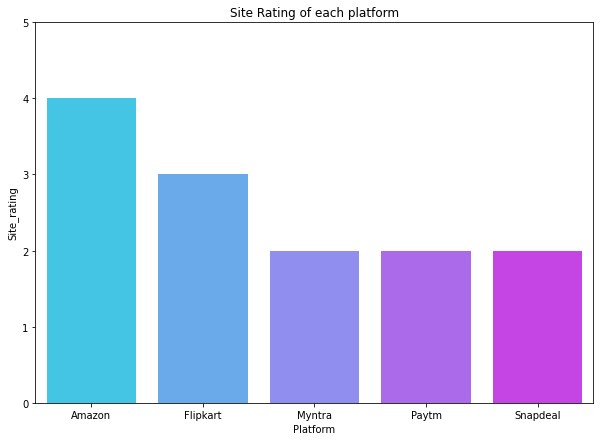

In [79]:
plt.figure(figsize= (10,7))
g=sn.barplot(Platform['Site_rating'].index,Platform['Site_rating'],palette = 'cool')
g.set_ylim(0,5)
plt.title('Site Rating of each platform')
plt.xlabel('Platform')
plt.show()

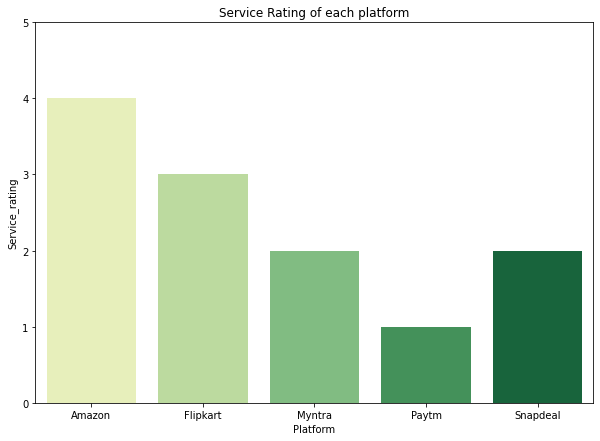

In [80]:
plt.figure(figsize= (10,7))
g=sn.barplot(Platform['Service_rating'].index,Platform['Service_rating'],palette = 'YlGn')
g.set_ylim(0,5)
plt.title('Service Rating of each platform')
plt.xlabel('Platform')
plt.show()

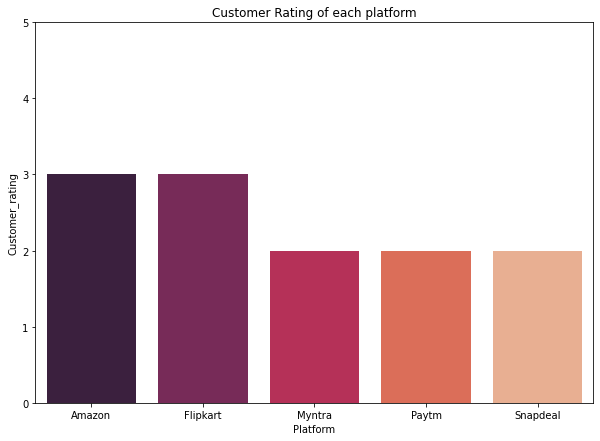

In [81]:
plt.figure(figsize= (10,7))
g=sn.barplot(Platform['Customer_rating'].index,Platform['Customer_rating'],palette = 'rocket')
g.set_ylim(0,5)
plt.title('Customer Rating of each platform')
plt.xlabel('Platform')
plt.show()

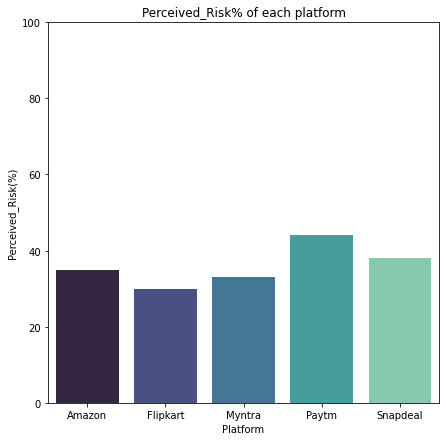

In [82]:
plt.figure(figsize= (7,7))
g=sn.barplot(Platform['Perceived_Risk(%)'].index,Platform['Perceived_Risk(%)'],palette = 'mako')
g.set_ylim(0, 100)
plt.title('Perceived_Risk% of each platform')
plt.xlabel('Platform')
plt.show()

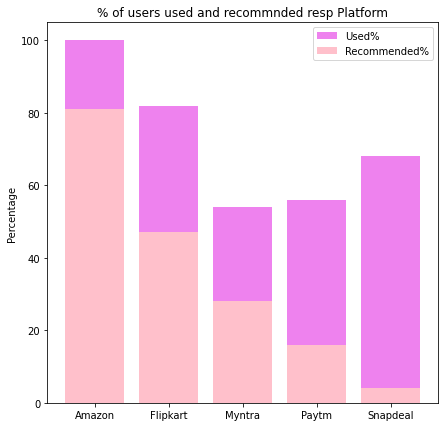

In [83]:
plt.figure(figsize= (7,7))
plt.bar(Platform['Used(%)'].index,Platform['Used(%)'],color='violet',label='Used%')
plt.bar(Platform['recommend(%)'].index,[81,47,28,16,4],color='pink',label='Recommended%')
plt.ylabel('Percentage')
plt.title('% of users used and recommnded resp Platform')
plt.legend()
plt.show()

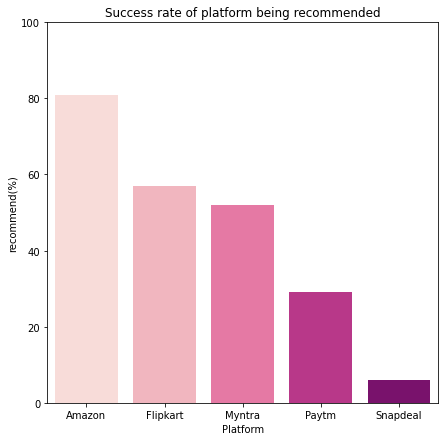

In [84]:
plt.figure(figsize= (7,7))
g=sn.barplot(Platform['recommend(%)'].index,Platform['recommend(%)'],palette = 'RdPu')
g.set_ylim(0, 100)
plt.title('Success rate of platform being recommended')
plt.xlabel('Platform')
plt.show()

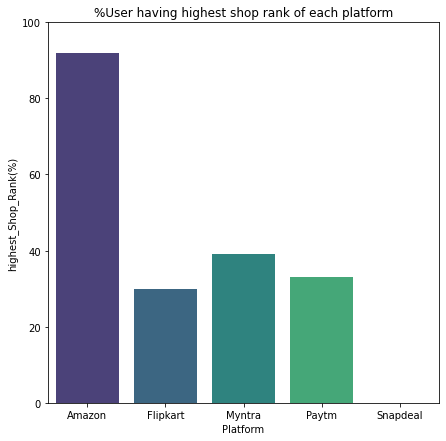

In [85]:
plt.figure(figsize= (7,7))
g=sn.barplot(Platform['highest_Shop_Rank(%)'].index,Platform['highest_Shop_Rank(%)'],palette = 'viridis')
g.set_ylim(0, 100)
plt.title('%User having highest shop rank of each platform')
plt.xlabel('Platform')
plt.show()

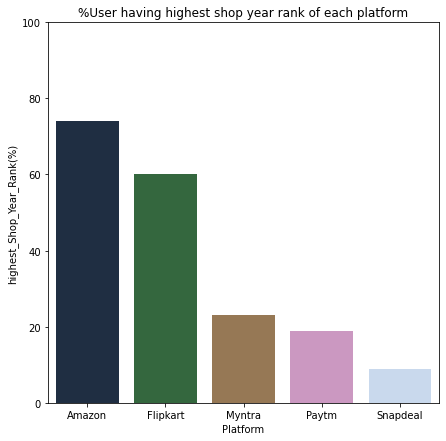

In [86]:
plt.figure(figsize= (7,7))
g=sn.barplot(Platform['highest_Shop_Year_Rank(%)'].index,Platform['highest_Shop_Year_Rank(%)'],palette = 'cubehelix')
g.set_ylim(0, 100)
plt.title('%User having highest shop year rank of each platform')
plt.xlabel('Platform')
plt.show()

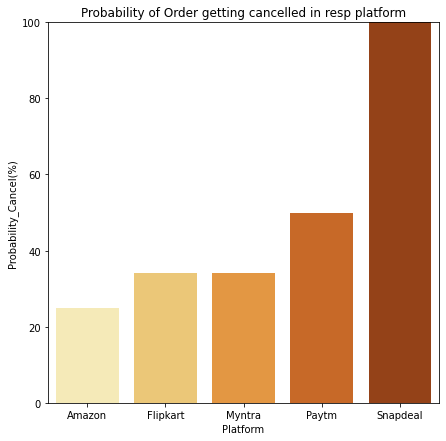

In [87]:
plt.figure(figsize= (7,7))
g=sn.barplot(Platform['Probability_Cancel(%)'].index,Platform['Probability_Cancel(%)'],palette = 'YlOrBr')
g.set_ylim(0, 100)
plt.title('Probability of Order getting cancelled in resp platform')
plt.xlabel('Platform')
plt.show()

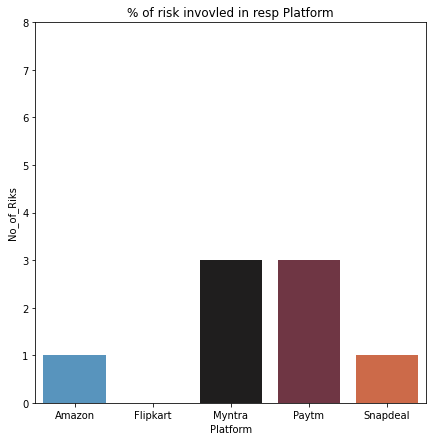

In [88]:
plt.figure(figsize= (7,7))
g=sn.barplot(Platform['No_of_Riks'].index,Platform['No_of_Riks'],palette = 'icefire')
g.set_ylim(0,8)
plt.title('% of risk invovled in resp Platform')
plt.xlabel('Platform')
plt.show()

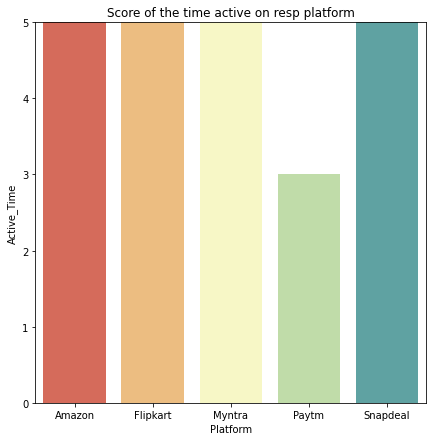

In [89]:
plt.figure(figsize= (7,7))
g=sn.barplot(Platform['Active_Time'].index,Platform['Active_Time'],palette = 'Spectral')
g.set_ylim(0,5)
plt.title('Score of the time active on resp platform')
plt.xlabel('Platform')
plt.show()

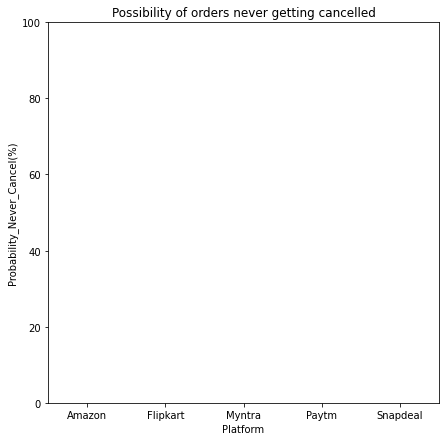

In [90]:
plt.figure(figsize= (7,7))
g=sn.barplot(Platform['Probability_Never_Cancel(%)'].index,Platform['Probability_Never_Cancel(%)'],palette = 'coolwarm')
g.set_ylim(0, 100)
plt.title('Possibility of orders never getting cancelled')
plt.xlabel('Platform')
plt.show()

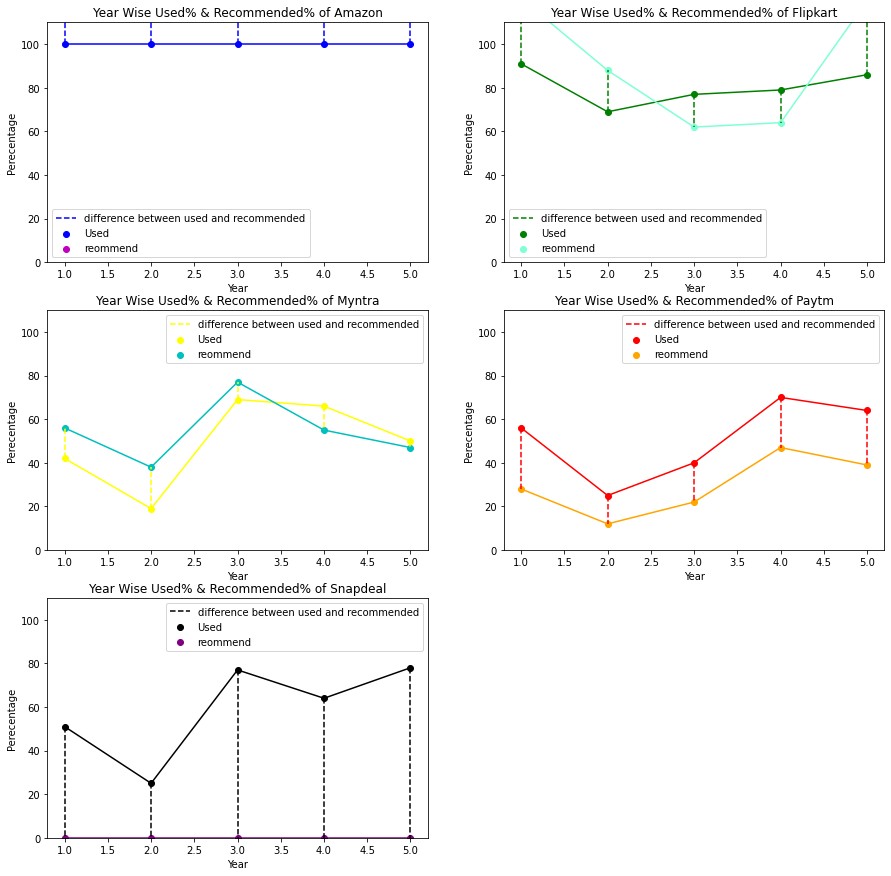

In [91]:
plt.figure(figsize= (15,15))
plt.subplot(3,2,1)
plt.scatter(1,Year_Wise['Used%_1']['Amazon'],color='blue',label='Used')
plt.scatter(2,Year_Wise['Used%_2']['Amazon'],color='blue')
plt.scatter(3,Year_Wise['Used%_3']['Amazon'],color='blue')
plt.scatter(4,Year_Wise['Used%_4']['Amazon'],color='blue')
plt.scatter(5,Year_Wise['Used%_5']['Amazon'],color='blue')
plt.plot([1,2],[Year_Wise['Used%_1']['Amazon'],Year_Wise['Used%_2']['Amazon']],color='blue')
plt.plot([2,3],[Year_Wise['Used%_2']['Amazon'],Year_Wise['Used%_3']['Amazon']],color='blue')
plt.plot([3,4],[Year_Wise['Used%_3']['Amazon'],Year_Wise['Used%_4']['Amazon']],color='blue')
plt.plot([4,5],[Year_Wise['Used%_4']['Amazon'],Year_Wise['Used%_5']['Amazon']],color='blue')
plt.scatter(1,Year_Wise['recommend%_1']['Amazon'],color='m',label='reommend')
plt.scatter(2,Year_Wise['recommend%_2']['Amazon'],color='m')
plt.scatter(3,Year_Wise['recommend%_3']['Amazon'],color='m')
plt.scatter(4,Year_Wise['recommend%_4']['Amazon'],color='m')
plt.scatter(5,Year_Wise['recommend%_5']['Amazon'],color='m')
plt.plot([1,2],[Year_Wise['recommend%_1']['Amazon'],Year_Wise['recommend%_2']['Amazon']],color='m')
plt.plot([2,3],[Year_Wise['recommend%_2']['Amazon'],Year_Wise['recommend%_3']['Amazon']],color='m')
plt.plot([3,4],[Year_Wise['recommend%_3']['Amazon'],Year_Wise['recommend%_4']['Amazon']],color='m')
plt.plot([4,5],[Year_Wise['recommend%_4']['Amazon'],Year_Wise['recommend%_5']['Amazon']],color='m')
plt.plot([1,1],[Year_Wise['Used%_1']['Amazon'],Year_Wise['recommend%_1']['Amazon']],'--',color='blue',label='difference between used and recommended')
plt.plot([2,2],[Year_Wise['Used%_2']['Amazon'],Year_Wise['recommend%_2']['Amazon']],'--',color='blue')
plt.plot([3,3],[Year_Wise['Used%_3']['Amazon'],Year_Wise['recommend%_3']['Amazon']],'--',color='blue')
plt.plot([4,4],[Year_Wise['Used%_4']['Amazon'],Year_Wise['recommend%_4']['Amazon']],'--',color='blue')
plt.plot([5,5],[Year_Wise['Used%_5']['Amazon'],Year_Wise['recommend%_5']['Amazon']],'--',color='blue')
plt.xlabel('Year')
plt.ylabel('Perecentage')
plt.title('Year Wise Used% & Recommended% of Amazon')
plt.legend()
plt.ylim(0,110)
plt.subplot(3,2,2)

plt.scatter(1,Year_Wise['Used%_1']['Flipkart'],color='green',label='Used')
plt.scatter(2,Year_Wise['Used%_2']['Flipkart'],color='green')
plt.scatter(3,Year_Wise['Used%_3']['Flipkart'],color='green')
plt.scatter(4,Year_Wise['Used%_4']['Flipkart'],color='green')
plt.scatter(5,Year_Wise['Used%_5']['Flipkart'],color='green')
plt.plot([1,2],[Year_Wise['Used%_1']['Flipkart'],Year_Wise['Used%_2']['Flipkart']],color='green')
plt.plot([2,3],[Year_Wise['Used%_2']['Flipkart'],Year_Wise['Used%_3']['Flipkart']],color='green')
plt.plot([3,4],[Year_Wise['Used%_3']['Flipkart'],Year_Wise['Used%_4']['Flipkart']],color='green')
plt.plot([4,5],[Year_Wise['Used%_4']['Flipkart'],Year_Wise['Used%_5']['Flipkart']],color='green')
plt.scatter(1,round((Year_Wise['recommend_1']['Flipkart']*100)/Year_Wise['Used_1']['Amazon']),color='aquamarine',label='reommend')
plt.scatter(2,round((Year_Wise['recommend_2']['Flipkart']*100)/Year_Wise['Used_2']['Amazon']),color='aquamarine')
plt.scatter(3,round((Year_Wise['recommend_3']['Flipkart']*100)/Year_Wise['Used_3']['Amazon']),color='aquamarine')
plt.scatter(4,round((Year_Wise['recommend_4']['Flipkart']*100)/Year_Wise['Used_4']['Amazon']),color='aquamarine')
plt.scatter(5,round((Year_Wise['recommend_5']['Flipkart']*100)/Year_Wise['Used_5']['Amazon']),color='aquamarine')
plt.plot([1,2],[round((Year_Wise['recommend_1']['Flipkart']*100)/Year_Wise['Used_1']['Amazon']),
                round((Year_Wise['recommend_2']['Flipkart']*100)/Year_Wise['Used_2']['Amazon'])],color='aquamarine')
plt.plot([2,3],[round((Year_Wise['recommend_2']['Flipkart']*100)/Year_Wise['Used_2']['Amazon']),
                round((Year_Wise['recommend_3']['Flipkart']*100)/Year_Wise['Used_3']['Amazon'])],color='aquamarine')
plt.plot([3,4],[round((Year_Wise['recommend_3']['Flipkart']*100)/Year_Wise['Used_3']['Amazon']),
                round((Year_Wise['recommend_4']['Flipkart']*100)/Year_Wise['Used_4']['Amazon'])],color='aquamarine')
plt.plot([4,5],[round((Year_Wise['recommend_4']['Flipkart']*100)/Year_Wise['Used_4']['Amazon']),
                round((Year_Wise['recommend_5']['Flipkart']*100)/Year_Wise['Used_5']['Amazon'])],color='aquamarine')
plt.plot([1,1],[Year_Wise['Used%_1']['Flipkart'],
               round((Year_Wise['recommend_1']['Flipkart']*100)/Year_Wise['Used_1']['Amazon'])],'--',color='green',label='difference between used and recommended')
plt.plot([2,2],[Year_Wise['Used%_2']['Flipkart'],
               round((Year_Wise['recommend_2']['Flipkart']*100)/Year_Wise['Used_2']['Amazon'])],'--',color='green')
plt.plot([3,3],[Year_Wise['Used%_3']['Flipkart'],
               round((Year_Wise['recommend_3']['Flipkart']*100)/Year_Wise['Used_3']['Amazon'])],'--',color='green')
plt.plot([4,4],[Year_Wise['Used%_4']['Flipkart'],
               round((Year_Wise['recommend_4']['Flipkart']*100)/Year_Wise['Used_4']['Amazon'])],'--',color='green')
plt.plot([5,5],[Year_Wise['Used%_5']['Flipkart'],
               round((Year_Wise['recommend_5']['Flipkart']*100)/Year_Wise['Used_5']['Amazon'])],'--',color='green')
plt.ylim(0,110)
plt.xlabel('Year')
plt.ylabel('Perecentage')
plt.title('Year Wise Used% & Recommended% of Flipkart')
plt.legend()
plt.subplot(3,2,3)

plt.scatter(1,Year_Wise['Used%_1']['Myntra'],color='yellow',label='Used')
plt.scatter(2,Year_Wise['Used%_2']['Myntra'],color='yellow')
plt.scatter(3,Year_Wise['Used%_3']['Myntra'],color='yellow')
plt.scatter(4,Year_Wise['Used%_4']['Myntra'],color='yellow')
plt.scatter(5,Year_Wise['Used%_5']['Myntra'],color='yellow')
plt.plot([1,2],[Year_Wise['Used%_1']['Myntra'],Year_Wise['Used%_2']['Myntra']],color='yellow')
plt.plot([2,3],[Year_Wise['Used%_2']['Myntra'],Year_Wise['Used%_3']['Myntra']],color='yellow')
plt.plot([3,4],[Year_Wise['Used%_3']['Myntra'],Year_Wise['Used%_4']['Myntra']],color='yellow')
plt.plot([4,5],[Year_Wise['Used%_4']['Myntra'],Year_Wise['Used%_5']['Myntra']],color='yellow')
plt.scatter(1,round((Year_Wise['recommend_1']['Myntra']*100)/Year_Wise['Used_1']['Amazon']),color='c',label='reommend')
plt.scatter(2,round((Year_Wise['recommend_2']['Myntra']*100)/Year_Wise['Used_2']['Amazon']),color='c')
plt.scatter(3,round((Year_Wise['recommend_3']['Myntra']*100)/Year_Wise['Used_3']['Amazon']),color='c')
plt.scatter(4,round((Year_Wise['recommend_4']['Myntra']*100)/Year_Wise['Used_4']['Amazon']),color='c')
plt.scatter(5,round((Year_Wise['recommend_5']['Myntra']*100)/Year_Wise['Used_5']['Amazon']),color='c')
plt.plot([1,2],[round((Year_Wise['recommend_1']['Myntra']*100)/Year_Wise['Used_1']['Amazon']),
                round((Year_Wise['recommend_2']['Myntra']*100)/Year_Wise['Used_2']['Amazon'])],color='c')
plt.plot([2,3],[round((Year_Wise['recommend_2']['Myntra']*100)/Year_Wise['Used_2']['Amazon']),
                round((Year_Wise['recommend_3']['Myntra']*100)/Year_Wise['Used_3']['Amazon'])],color='c')
plt.plot([3,4],[round((Year_Wise['recommend_3']['Myntra']*100)/Year_Wise['Used_3']['Amazon']),
                round((Year_Wise['recommend_4']['Myntra']*100)/Year_Wise['Used_4']['Amazon'])],color='c')
plt.plot([4,5],[round((Year_Wise['recommend_4']['Myntra']*100)/Year_Wise['Used_4']['Amazon']),
                round((Year_Wise['recommend_5']['Myntra']*100)/Year_Wise['Used_5']['Amazon'])],color='c')
plt.plot([1,1],[Year_Wise['Used%_1']['Myntra'],
               round((Year_Wise['recommend_1']['Myntra']*100)/Year_Wise['Used_1']['Amazon'])],'--',color='yellow',label='difference between used and recommended')
plt.plot([2,2],[Year_Wise['Used%_2']['Myntra'],
               round((Year_Wise['recommend_2']['Myntra']*100)/Year_Wise['Used_2']['Amazon'])],'--',color='yellow')
plt.plot([3,3],[Year_Wise['Used%_3']['Myntra'],
               round((Year_Wise['recommend_3']['Myntra']*100)/Year_Wise['Used_3']['Amazon'])],'--',color='yellow')
plt.plot([4,4],[Year_Wise['Used%_4']['Myntra'],
               round((Year_Wise['recommend_4']['Myntra']*100)/Year_Wise['Used_4']['Amazon'])],'--',color='yellow')
plt.plot([5,5],[Year_Wise['Used%_5']['Myntra'],
               round((Year_Wise['recommend_5']['Myntra']*100)/Year_Wise['Used_5']['Amazon'])],'--',color='yellow')
plt.ylim(0,110)
plt.xlabel('Year')
plt.ylabel('Perecentage')
plt.title('Year Wise Used% & Recommended% of Myntra')
plt.legend()
plt.subplot(3,2,4)

plt.scatter(1,Year_Wise['Used%_1']['Paytm'],color='red',label='Used')
plt.scatter(2,Year_Wise['Used%_2']['Paytm'],color='red')
plt.scatter(3,Year_Wise['Used%_3']['Paytm'],color='red')
plt.scatter(4,Year_Wise['Used%_4']['Paytm'],color='red')
plt.scatter(5,Year_Wise['Used%_5']['Paytm'],color='red')
plt.plot([1,2],[Year_Wise['Used%_1']['Paytm'],Year_Wise['Used%_2']['Paytm']],color='red')
plt.plot([2,3],[Year_Wise['Used%_2']['Paytm'],Year_Wise['Used%_3']['Paytm']],color='red')
plt.plot([3,4],[Year_Wise['Used%_3']['Paytm'],Year_Wise['Used%_4']['Paytm']],color='red')
plt.plot([4,5],[Year_Wise['Used%_4']['Paytm'],Year_Wise['Used%_5']['Paytm']],color='red')
plt.scatter(1,round((Year_Wise['recommend_1']['Paytm']*100)/Year_Wise['Used_1']['Amazon']),color='orange',label='reommend')
plt.scatter(2,round((Year_Wise['recommend_2']['Paytm']*100)/Year_Wise['Used_2']['Amazon']),color='orange')
plt.scatter(3,round((Year_Wise['recommend_3']['Paytm']*100)/Year_Wise['Used_3']['Amazon']),color='orange')
plt.scatter(4,round((Year_Wise['recommend_4']['Paytm']*100)/Year_Wise['Used_4']['Amazon']),color='orange')
plt.scatter(5,round((Year_Wise['recommend_5']['Paytm']*100)/Year_Wise['Used_5']['Amazon']),color='orange')
plt.plot([1,2],[round((Year_Wise['recommend_1']['Paytm']*100)/Year_Wise['Used_1']['Amazon']),
                round((Year_Wise['recommend_2']['Paytm']*100)/Year_Wise['Used_2']['Amazon'])],color='orange')
plt.plot([2,3],[round((Year_Wise['recommend_2']['Paytm']*100)/Year_Wise['Used_2']['Amazon']),
                round((Year_Wise['recommend_3']['Paytm']*100)/Year_Wise['Used_3']['Amazon'])],color='orange')
plt.plot([3,4],[round((Year_Wise['recommend_3']['Paytm']*100)/Year_Wise['Used_3']['Amazon']),
                round((Year_Wise['recommend_4']['Paytm']*100)/Year_Wise['Used_4']['Amazon'])],color='orange')
plt.plot([4,5],[round((Year_Wise['recommend_4']['Paytm']*100)/Year_Wise['Used_4']['Amazon']),
                round((Year_Wise['recommend_5']['Paytm']*100)/Year_Wise['Used_5']['Amazon'])],color='orange')
plt.plot([1,1],[Year_Wise['Used%_1']['Paytm'],
               round((Year_Wise['recommend_1']['Paytm']*100)/Year_Wise['Used_1']['Amazon'])],'--',color='red',label='difference between used and recommended')
plt.plot([2,2],[Year_Wise['Used%_2']['Paytm'],
               round((Year_Wise['recommend_2']['Paytm']*100)/Year_Wise['Used_2']['Amazon'])],'--',color='red')
plt.plot([3,3],[Year_Wise['Used%_3']['Paytm'],
               round((Year_Wise['recommend_3']['Paytm']*100)/Year_Wise['Used_3']['Amazon'])],'--',color='red')
plt.plot([4,4],[Year_Wise['Used%_4']['Paytm'],
               round((Year_Wise['recommend_4']['Paytm']*100)/Year_Wise['Used_4']['Amazon'])],'--',color='red')
plt.plot([5,5],[Year_Wise['Used%_5']['Paytm'],
               round((Year_Wise['recommend_5']['Paytm']*100)/Year_Wise['Used_5']['Amazon'])],'--',color='red')
plt.ylim(0,110)
plt.xlabel('Year')
plt.ylabel('Perecentage')
plt.title('Year Wise Used% & Recommended% of Paytm')
plt.legend()
plt.subplot(3,2,5)

plt.scatter(1,Year_Wise['Used%_1']['Snapdeal'],color='black',label='Used')
plt.scatter(2,Year_Wise['Used%_2']['Snapdeal'],color='black')
plt.scatter(3,Year_Wise['Used%_3']['Snapdeal'],color='black')
plt.scatter(4,Year_Wise['Used%_4']['Snapdeal'],color='black')
plt.scatter(5,Year_Wise['Used%_5']['Snapdeal'],color='black')
plt.plot([1,2],[Year_Wise['Used%_1']['Snapdeal'],Year_Wise['Used%_2']['Snapdeal']],color='black')
plt.plot([2,3],[Year_Wise['Used%_2']['Snapdeal'],Year_Wise['Used%_3']['Snapdeal']],color='black')
plt.plot([3,4],[Year_Wise['Used%_3']['Snapdeal'],Year_Wise['Used%_4']['Snapdeal']],color='black')
plt.plot([4,5],[Year_Wise['Used%_4']['Snapdeal'],Year_Wise['Used%_5']['Snapdeal']],color='black')
plt.scatter(1,round((Year_Wise['recommend_1']['Snapdeal']*100)/Year_Wise['Used_1']['Amazon']),color='purple',label='reommend')
plt.scatter(2,round((Year_Wise['recommend_2']['Snapdeal']*100)/Year_Wise['Used_2']['Amazon']),color='purple')
plt.scatter(3,round((Year_Wise['recommend_3']['Snapdeal']*100)/Year_Wise['Used_3']['Amazon']),color='purple')
plt.scatter(4,round((Year_Wise['recommend_4']['Snapdeal']*100)/Year_Wise['Used_4']['Amazon']),color='purple')
plt.scatter(5,round((Year_Wise['recommend_5']['Snapdeal']*100)/Year_Wise['Used_5']['Amazon']),color='purple')
plt.plot([1,2],[round((Year_Wise['recommend_1']['Snapdeal']*100)/Year_Wise['Used_1']['Amazon']),
                round((Year_Wise['recommend_2']['Snapdeal']*100)/Year_Wise['Used_2']['Amazon'])],color='purple')
plt.plot([2,3],[round((Year_Wise['recommend_2']['Snapdeal']*100)/Year_Wise['Used_2']['Amazon']),
                round((Year_Wise['recommend_3']['Snapdeal']*100)/Year_Wise['Used_3']['Amazon'])],color='purple')
plt.plot([3,4],[round((Year_Wise['recommend_3']['Snapdeal']*100)/Year_Wise['Used_3']['Amazon']),
                round((Year_Wise['recommend_4']['Snapdeal']*100)/Year_Wise['Used_4']['Amazon'])],color='purple')
plt.plot([4,5],[round((Year_Wise['recommend_4']['Snapdeal']*100)/Year_Wise['Used_4']['Amazon']),
                round((Year_Wise['recommend_5']['Snapdeal']*100)/Year_Wise['Used_5']['Amazon'])],color='purple')
plt.plot([1,1],[Year_Wise['Used%_1']['Snapdeal'],
               round((Year_Wise['recommend_1']['Snapdeal']*100)/Year_Wise['Used_1']['Amazon'])],'--',color='black',label='difference between used and recommended')
plt.plot([2,2],[Year_Wise['Used%_2']['Snapdeal'],
               round((Year_Wise['recommend_2']['Snapdeal']*100)/Year_Wise['Used_2']['Amazon'])],'--',color='black')
plt.plot([3,3],[Year_Wise['Used%_3']['Snapdeal'],
               round((Year_Wise['recommend_3']['Snapdeal']*100)/Year_Wise['Used_3']['Amazon'])],'--',color='black')
plt.plot([4,4],[Year_Wise['Used%_4']['Snapdeal'],
               round((Year_Wise['recommend_4']['Snapdeal']*100)/Year_Wise['Used_4']['Amazon'])],'--',color='black')
plt.plot([5,5],[Year_Wise['Used%_5']['Snapdeal'],
               round((Year_Wise['recommend_5']['Snapdeal']*100)/Year_Wise['Used_5']['Amazon'])],'--',color='black')
plt.ylim(0,110)
plt.xlabel('Year')
plt.ylabel('Perecentage')
plt.title('Year Wise Used% & Recommended% of Snapdeal')
plt.legend()
plt.show()

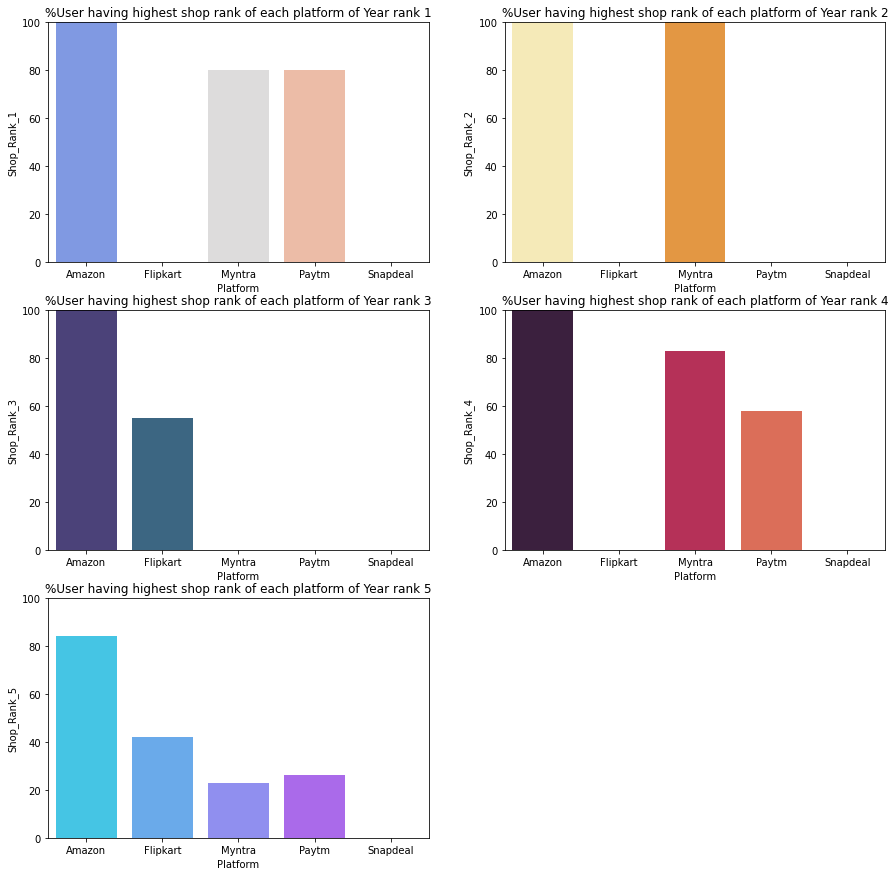

In [92]:
plt.figure(figsize= (15,15))
plt.subplot(3,2,1)
g=sn.barplot(Year_Wise['Shop_Rank_1'].index,Year_Wise['Shop_Rank_1'],palette = 'coolwarm')
g.set_ylim(0, 100)
plt.title('%User having highest shop rank of each platform of Year rank 1')
plt.xlabel('Platform')
plt.subplot(3,2,2)
g=sn.barplot(Year_Wise['Shop_Rank_1'].index,Year_Wise['Shop_Rank_2'],palette = 'YlOrBr')
g.set_ylim(0, 100)
plt.title('%User having highest shop rank of each platform of Year rank 2')
plt.xlabel('Platform')
plt.subplot(3,2,3)
g=sn.barplot(Year_Wise['Shop_Rank_1'].index,Year_Wise['Shop_Rank_3'],palette = 'viridis')
g.set_ylim(0, 100)
plt.title('%User having highest shop rank of each platform of Year rank 3')
plt.xlabel('Platform')
plt.subplot(3,2,4)
g=sn.barplot(Year_Wise['Shop_Rank_1'].index,Year_Wise['Shop_Rank_4'],palette = 'rocket')
g.set_ylim(0, 100)
plt.title('%User having highest shop rank of each platform of Year rank 4')
plt.xlabel('Platform')
plt.subplot(3,2,5)
g=sn.barplot(Year_Wise['Shop_Rank_1'].index,Year_Wise['Shop_Rank_5'],palette = 'cool')
g.set_ylim(0, 100)
plt.title('%User having highest shop rank of each platform of Year rank 5')
plt.xlabel('Platform')
plt.show()

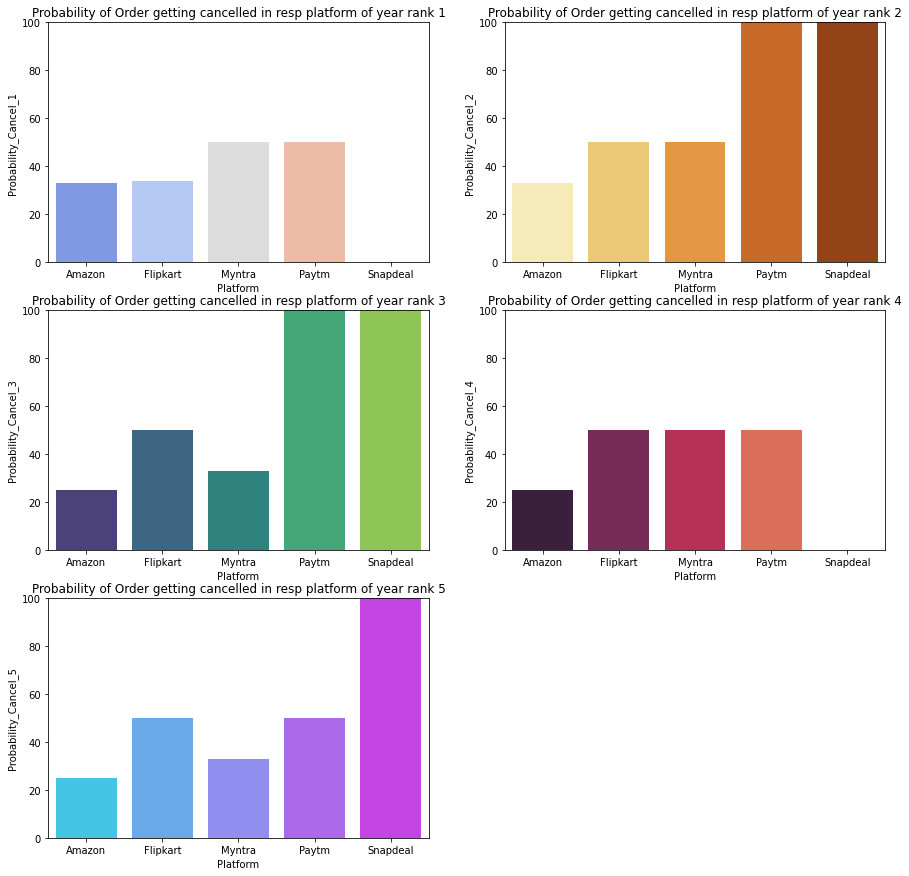

In [93]:
plt.figure(figsize= (15,15))
plt.subplot(3,2,1)
g=sn.barplot(Year_Wise['Probability_Cancel_1'].index,Year_Wise['Probability_Cancel_1'],palette = 'coolwarm')
g.set_ylim(0, 100)
plt.title('Probability of Order getting cancelled in resp platform of year rank 1')
plt.xlabel('Platform')
plt.subplot(3,2,2)
g=sn.barplot(Year_Wise['Probability_Cancel_1'].index,Year_Wise['Probability_Cancel_2'],palette = 'YlOrBr')
g.set_ylim(0, 100)
plt.title('Probability of Order getting cancelled in resp platform of year rank 2')
plt.xlabel('Platform')
plt.subplot(3,2,3)
g=sn.barplot(Year_Wise['Probability_Cancel_1'].index,Year_Wise['Probability_Cancel_3'],palette = 'viridis')
g.set_ylim(0, 100)
plt.title('Probability of Order getting cancelled in resp platform of year rank 3')
plt.xlabel('Platform')
plt.subplot(3,2,4)
g=sn.barplot(Year_Wise['Probability_Cancel_1'].index,Year_Wise['Probability_Cancel_4'],palette = 'rocket')
g.set_ylim(0, 100)
plt.title('Probability of Order getting cancelled in resp platform of year rank 4')
plt.xlabel('Platform')
plt.subplot(3,2,5)
g=sn.barplot(Year_Wise['Probability_Cancel_1'].index,Year_Wise['Probability_Cancel_5'],palette = 'cool')
g.set_ylim(0, 100)
plt.title('Probability of Order getting cancelled in resp platform of year rank 5')
plt.xlabel('Platform')
plt.show()

In [94]:
Year_Wise

,Used_1,recommend_1,Used%_1,recommend%_1,Shop_Rank_1,Probability_Cancel_1,Risk(%)_1,Used_2,recommend_2,Used%_2,recommend%_2,Shop_Rank_2,Probability_Cancel_2,Risk(%)_2,Used_3,recommend_3,Used%_3,recommend%_3,Shop_Rank_3,Probability_Cancel_3,Risk(%)_3,Used_4,recommend_4,Used%_4,recommend%_4,Shop_Rank_4,Probability_Cancel_4,Risk(%)_4,Used_5,recommend_5,Used%_5,recommend%_5,Shop_Rank_5,Probability_Cancel_5,Risk(%)_5,Active_1,Active_2,Active_3,Active_4,Active_5
Amazon,43,66,100,153,100,33,26,16,20,100,125,100,33,42,65,126,100,194,100,25,43,47,80,100,170,100,25,35,98,146,100,149,84,25,31,5,5,5,3,5
Flipkart,39,52,91,133,0,34,31,11,14,69,127,0,50,70,50,40,77,80,55,50,15,37,30,79,81,0,50,33,84,118,86,140,42,50,33,5,1,5,5,5
Myntra,18,24,42,133,80,50,59,3,6,19,200,100,50,25,45,50,69,111,0,33,26,31,26,66,84,83,50,26,49,46,50,94,23,33,36,5,5,5,3,5
Paytm,24,12,56,50,80,50,58,4,2,25,50,0,100,41,26,14,40,54,0,100,57,33,22,70,67,58,50,36,63,38,64,60,26,50,37,4,5,3,3,3
Snapdeal,22,0,51,0,0,0,49,4,0,25,0,0,100,25,50,0,77,0,0,100,39,30,0,64,0,0,0,34,76,0,78,0,0,100,36,5,5,5,3,5


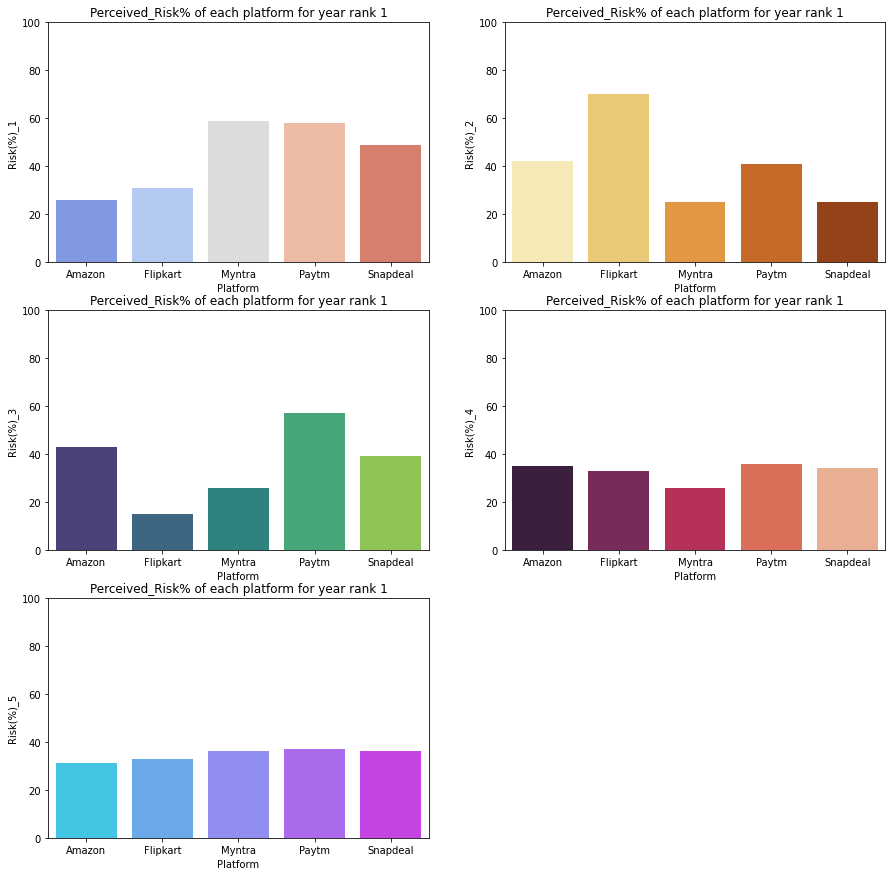

In [95]:
plt.figure(figsize= (15,15))
plt.subplot(3,2,1)
g=sn.barplot(Year_Wise['Risk(%)_1'].index,Year_Wise['Risk(%)_1'],palette = 'coolwarm')
g.set_ylim(0, 100)
plt.title('Perceived_Risk% of each platform for year rank 1')
plt.xlabel('Platform')
plt.subplot(3,2,2)
g=sn.barplot(Year_Wise['Risk(%)_1'].index,Year_Wise['Risk(%)_2'],palette = 'YlOrBr')
g.set_ylim(0, 100)
plt.title('Perceived_Risk% of each platform for year rank 1')
plt.xlabel('Platform')
plt.subplot(3,2,3)
g=sn.barplot(Year_Wise['Risk(%)_3'].index,Year_Wise['Risk(%)_3'],palette = 'viridis')
g.set_ylim(0, 100)
plt.title('Perceived_Risk% of each platform for year rank 1')
plt.xlabel('Platform')
plt.subplot(3,2,4)
g=sn.barplot(Year_Wise['Risk(%)_4'].index,Year_Wise['Risk(%)_4'],palette = 'rocket')
g.set_ylim(0, 100)
plt.title('Perceived_Risk% of each platform for year rank 1')
plt.xlabel('Platform')
plt.subplot(3,2,5)
g=sn.barplot(Year_Wise['Risk(%)_1'].index,Year_Wise['Risk(%)_5'],palette = 'cool')
g.set_ylim(0, 100)
plt.title('Perceived_Risk% of each platform for year rank 1')
plt.xlabel('Platform')
plt.show()

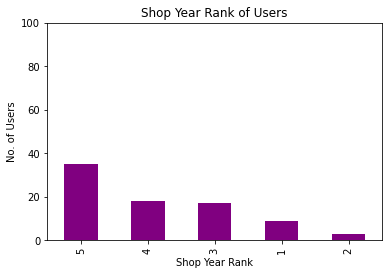

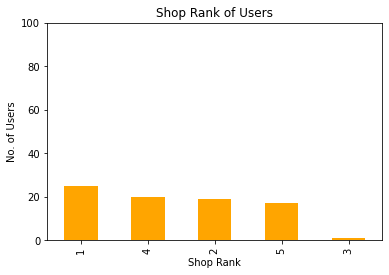

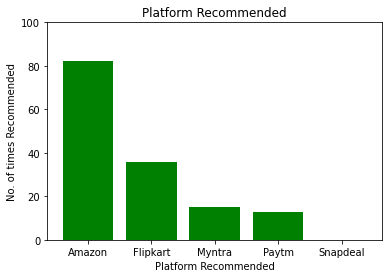

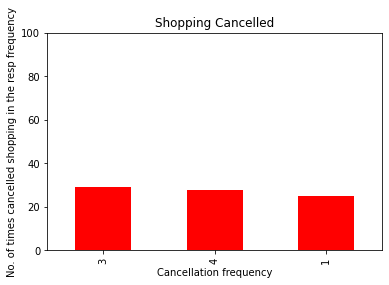

In [96]:
data[data['Number_of_platform_Used']==5]['shop_year_rank'].value_counts().plot(kind='bar',color='purple')
plt.title('Shop Year Rank of Users')
plt.xlabel('Shop Year Rank')
plt.ylabel('No. of Users')
plt.ylim(0,100)
plt.show()

data[data['Number_of_platform_Used']==5]['shop_rank'].value_counts().plot(kind='bar',color='orange')
plt.title('Shop Rank of Users')
plt.xlabel('Shop Rank')
plt.ylabel('No. of Users')
plt.ylim(0,100)
plt.show()

amazon=0
flipkart=0
myntra=0
snapdeal=0
paytm=0
for i in list(data[data['Number_of_platform_Used']==5].index):
    for j in data[data['Number_of_platform_Used']==5]['platform_recommend'][i].split(','):
        platform=j.split('.')[0].lower().strip()
        if platform=='amazon':
            amazon+=1
        elif platform=='flipkart':
            flipkart+=1
        elif platform=='myntra':
            myntra+=1
        elif platform=='paytm':
            paytm+=1
        elif platform=='snapdeal':
            snapdeal+=1
plt.bar(['Amazon','Flipkart','Myntra','Paytm','Snapdeal'],[amazon,flipkart,myntra,paytm,snapdeal],color='green')            
plt.title('Platform Recommended')
plt.xlabel('Platform Recommended')
plt.ylabel('No. of times Recommended')
plt.ylim(0,100)
plt.show()
data[data['Number_of_platform_Used']==5]['cancel_shopping'].value_counts().plot(kind='bar',color='red')
plt.title('Shopping Cancelled')
plt.xlabel('Cancellation frequency')
plt.ylabel('No. of times cancelled shopping in the resp frequency')
plt.ylim(0,100)
plt.show()